# 1. Import Libraries

In [2]:
# import library

import pandas as pd
import numpy as np
from scipy import stats

#Visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Import Sklearn
import sklearn
from imblearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import SMOTENC
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.decomposition import PCA
from feature_engine.outliers import Winsorizer
from statistics import mean
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import time
import warnings
warnings.filterwarnings('ignore') #turn off warning

# 2. Data Loading

In [4]:
# load data asli
df_ori = pd.read_csv('app_train_clean_2.csv')

In [5]:
# Untuk menjaga  data asli supaya tidak berubah dan hilang
df = df_ori.copy()

In [6]:
# Untuk menampilkan semua kolom
pd.set_option('display.max_columns', None)

# Menampilkan dataset credit card
df

,Unnamed: 0,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,9.0,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.0220,0.0198,0.0,0.0000,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.0000,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,9.0,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,0.535276,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.0790,0.0554,0.0,0.0000,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.0100,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.505998,0.555912,0.729567,0.0876,0.0763,0.9816,0.7552,0.0211,0.00,0.1379,0.1667,0.2083,0.0481,0.0756,0.0745,0.0

In [7]:
df.head()

,Unnamed: 0,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,9.0,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.0220,0.0198,0.0,0.0000,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.0000,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,9.0,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,0.535276,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.0790,0.0554,0.0,0.0000,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.0100,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.505998,0.555912,0.729567,0.0876,0.0763,0.9816,0.7552,0.0211,0.00,0.1379,0.1667,0.2083,0.0481,0.0756,0.0745,0.0

In [8]:
df.tail()

,Unnamed: 0,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
307506,307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,225000.0,Unaccompanied,Working,Secondary / secondary special,Separated,With parents,0.032561,-9327,-236,-8456.0,-1982,9.0,1,1,0,1,0,0,Sales staff,1.0,1,1,THURSDAY,15,0,0,0,0,0,0,Services,0.145570,0.681632,0.535276,0.2021,0.0887,0.9876,0.8300,0.0202,0.22,0.1034,0.6042,0.2708,0.0594,0.1484,0.1965,0.0753,0.1095,0.1008,0.0172,0.9782,0.7125,0.0172,0.0806,0.0345,0.4583,0.0417,0.0094,0.0882,0.0853,0.0,0.0125,0.2040,0.0887,0.9876,0.8323,0.0203,0.22,0.1034,0.6042,0.2708,0.0605,0.1509,0.2001,0.0757,0.1118,reg oper account,block of flats,0.2898,"Stone, brick",No,0.0,0.0,0.0,0.0,-273.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
307507,307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,225000.0,Unaccompanied,Pensioner,Secondary / secondary special,Widow,House / apartment,0.025164,-20775,365243,-4388.0,-4090,9.0,1,0,0,1,1,0,unknown,1.0,2,2,MONDAY,8,0,0,0,0,0,0,XNA,0.505998,0.115992,0.535276,0.0247,0.0435,0.9727,0.6260,0.0022,0.00,0.1034,0.0833,0.1250,0.0579,0.0202,0.0257,0.0000,0.0000,0.0252,0.0451,0.9727,0.6406,0.0022,0.0000,0.1034,0.0833,0.1250,0.0592,0.0220,0.0267,0.0,0.0000,0.0250,0.0435,0.9727,0.6310,0.0022,0.00,0.1034,0.0833,0.1250,0.0589,0.0205,0.0261,0.0000,0.0000,reg oper account,block of flats,0.0214,"Stone, brick",No,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
307508,307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,585000.0,Unaccompanied,Working,Higher education,Separated,House / apartment,0.005002,-14966,-7921,-6737.0,-5150,9.0,1,1,0,1,0,1,Managers,1.0,3,3,THURSDAY,9,0,0,0,0,1,1,School,0.744026,0.535722,0.218859,0.1031,0.0862,0.9816,0.7484,0.0123,0.00,0.2069,0.1667,0.2083,0.0481,0.0841,0.9279,0.0000,0.0000,0.105

In [9]:
# Menampilkan informasi tentang tipe data dan info lainnya.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 123 entries, Unnamed: 0 to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(42), object(16)
memory usage: 288.6+ MB


# 3. Feature Engineering

## 3.1 - Split Features(X) dan target (y)

In [10]:
# # Limit the number of samples to 50,000
# df_limited = df.sample(n=50000, random_state=42)

# # Memisahkan fitur dan target
# X = df_limited.drop('TARGET', axis=1)
# y = df_limited['TARGET']

In [11]:
# Memisahkan X semua kolom selain kolom default_payment_next_month menjadi fitur dan y sebagai kolom default_payment_next_month sbg kolom target
X = df.drop('TARGET', axis=1)
y = df['TARGET']

## 3.2 - Split Train set and Test set

In [12]:
# Split Train-Set & Test-set for Feature (X) & Target (y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2) # data utk test-set 20% & train-set 80%

# Show shape of Feature (X) in Train-set & Test-set
print('Train size: ', X_train.shape)
print('Test size: ', X_test.shape)

# Show shape of Target (y) in Train-set & Test-set
print('Train size: ', y_train.shape)
print('Test size: ', y_test.shape)

Train size:  (246008, 122)
Test size:  (61503, 122)
Train size:  (246008,)
Test size:  (61503,)


In [13]:
# # Split Train-Set & Test-set for Feature (X) & Target (y)
# X_sample, buang_1, y_sample, buang_2 = train_test_split(X, y, test_size=0.83, random_state=2) # data utk test-set 20% & train-set 80%

# # Show shape of Feature (X) in Train-set & Test-set
# print('sample size: ', X_sample.shape)
# print('sample size: ', y_sample.shape)

# # Show shape of Target (y) in Train-set & Test-set
# print('buang size: ', buang_1.shape)
# print('buang size: ', buang_2.shape)

## 3.3 - Feature Selection

In [14]:
col_to_keep = ['SK_ID_CURR','AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
               'DAYS_BIRTH','EXT_SOURCE_1','EXT_SOURCE_3','EXT_SOURCE_2',
               'DAYS_ID_PUBLISH','DAYS_REGISTRATION','OCCUPATION_TYPE','DAYS_LAST_PHONE_CHANGE', 'DAYS_EMPLOYED']

# redefine X_train based on column to keep
X_train = X_train[col_to_keep]
X_test = X_test[col_to_keep]

Kami mempertahankan 13 fitur baik yang numerical maupun categorical, `karena 13 kolom tersebut memiliki nilai korelasi postif & nilai korelasi negatif yang nilai korelasinya paling tinggi dari semua kolom dan mengambil kolom yg domain bisnisnya memiliki pengeruh yg besar dengan kolom target.` Seperti yang telah saya jelaskan dan telah dicek korelasinya pada BAB EDA mengenai kolom mana saja yg memiliki korelasi yg besar, kecil, postif & negatif dengan kolom target, sehingga 13 fitur yang digunakan untuk model nanti.

In [15]:
# Print the new shape
print('Train Size :', X_train.shape)
print('Test Size :', X_test.shape)

Train Size : (246008, 13)
Test Size : (61503, 13)


In [16]:
# Menampilkan kolom-kolom yg dipertahankan setelah dilakukan feature selection
X_train

,SK_ID_CURR,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,DAYS_BIRTH,EXT_SOURCE_1,EXT_SOURCE_3,EXT_SOURCE_2,DAYS_ID_PUBLISH,DAYS_REGISTRATION,OCCUPATION_TYPE,DAYS_LAST_PHONE_CHANGE,DAYS_EMPLOYED
22973,126731,45000.0,191880.0,18819.0,-22555,0.786108,0.617826,0.157320,-4326,-10407.0,unknown,0.0,365243
229678,366022,180000.0,450000.0,20979.0,-19279,0.626384,0.662638,0.556581,-2826,-5438.0,Laborers,-503.0,-430
1237,101460,85500.0,454500.0,23337.0,-16893,0.505998,0.535276,0.591165,-414,-4262.0,Cleaning staff,-1530.0,-284
240062,377981,202500.0,755190.0,36459.0,-11745,0.505998,0.486653,0.238699,-1236,-6010.0,Sales staff,-1040.0,-1034
33320,138606,252000.0,1159411.5,46111.5,-15422,0.505998,0.477649,0.466012,-4846,-4428.0,Managers,-714.0,-1008
...,...,...,...,...,...,...,...,...,...,...,...,...,...
33867,139243,315000.0,900000.0,38263.5,-14315,0.734973,0.692559,0.632271,-5083,-6727.0,Laborers,-1453.0,-2304
84434,197953,153000.0,808650.0,26217.0,-12737,0.724015,0.468660,0.745861,-1367,-765.0,Managers,-1752.0,-4677
95816,211235,90000.0,535500.0,22819.5,-23186,0.881423,0.535276,0.343698,-4375,-4665.0,unknown,-20.0,365243
203245,335629,157500.0,808650.0,26217.0,-17413,0.603220,0.535276,0.542123,-947,-6346.0,Drivers,0.0,-1109


In [17]:
# Mengecek kembali tipe data setelah feature selection
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 246008 entries, 22973 to 100879
Data columns (total 13 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   SK_ID_CURR              246008 non-null  int64  
 1   AMT_INCOME_TOTAL        246008 non-null  float64
 2   AMT_CREDIT              246008 non-null  float64
 3   AMT_ANNUITY             246008 non-null  float64
 4   DAYS_BIRTH              246008 non-null  int64  
 5   EXT_SOURCE_1            246008 non-null  float64
 6   EXT_SOURCE_3            246008 non-null  float64
 7   EXT_SOURCE_2            246008 non-null  float64
 8   DAYS_ID_PUBLISH         246008 non-null  int64  
 9   DAYS_REGISTRATION       246008 non-null  float64
 10  OCCUPATION_TYPE         246008 non-null  object 
 11  DAYS_LAST_PHONE_CHANGE  246008 non-null  float64
 12  DAYS_EMPLOYED           246008 non-null  int64  
dtypes: float64(8), int64(4), object(1)
memory usage: 26.3+ MB


tipe data sudah benar & tidak terdapat missing value 

## 3.4 - Handling Outlier

### 3.4.1 - Cek Skewness

In [18]:
# Untuk melihat apakah distribusi normal atau skewness 
print('Distribution of column SK_ID_CURR  : ', X_train['SK_ID_CURR'].skew())
print('Distribution of column AMT_INCOME_TOTAL  : ', X_train['AMT_INCOME_TOTAL'].skew())
print('Distribution of column AMT_CREDIT  : ', X_train['AMT_CREDIT'].skew())
print('Distribution of column AMT_ANNUITY  : ', X_train['AMT_ANNUITY'].skew())
print('Distribution of column DAYS_BIRTH  : ', X_train['DAYS_BIRTH'].skew())
print('Distribution of column DAYS_EMPLOYED  : ', X_train['DAYS_EMPLOYED'].skew())
print('Distribution of column EXT_SOURCE_3  : ', X_train['EXT_SOURCE_3'].skew())
print('Distribution of column EXT_SOURCE_2  : ', X_train['EXT_SOURCE_2'].skew())
print('Distribution of column EXT_SOURCE_1  : ', X_train['EXT_SOURCE_1'].skew())
print('Distribution of column DAYS_ID_PUBLISH  : ', X_train['DAYS_ID_PUBLISH'].skew())
print('Distribution of column DAYS_REGISTRATION  : ', X_train['DAYS_REGISTRATION'].skew())
print('Distribution of column DAYS_LAST_PHONE_CHANGE  : ', X_train['DAYS_LAST_PHONE_CHANGE'].skew())

Distribution of column SK_ID_CURR  :  -0.0021292042870697165
Distribution of column AMT_INCOME_TOTAL  :  368.3078905971151
Distribution of column AMT_CREDIT  :  1.2254257469429275
Distribution of column AMT_ANNUITY  :  1.6146496558306838
Distribution of column DAYS_BIRTH  :  -0.11456273679132618
Distribution of column DAYS_EMPLOYED  :  1.6613450505048135
Distribution of column EXT_SOURCE_3  :  -0.5364265215804269
Distribution of column EXT_SOURCE_2  :  -0.7964169591667506
Distribution of column EXT_SOURCE_1  :  -0.15023819309056088
Distribution of column DAYS_ID_PUBLISH  :  0.3487453118086395
Distribution of column DAYS_REGISTRATION  :  -0.5876448033664685
Distribution of column DAYS_LAST_PHONE_CHANGE  :  -0.714508124474249


**Statement**: Distribusi normal akan memiliki kemencengan mulai dari `-0,5` hingga `0,5`. Distribusi di luar kisaran ini dianggap Skewed distribution

Normal Distribution: SK_ID_CURR, DAYS_BIRTH, EXT_SOURCE_1, DAYS_ID_PUBLISH

Skewed distribution: AMT_INCOME_TOTAL, AMT_CREDIT, AMT_ANNUITY, DAYS_EMPLOYED, EXT_SOURCE_3, EXT_SOURCE_2, DAYS_REGISTRATION & DAYS_LAST_PHONE_CHANGE

In [19]:
# Membagi data yang distribusi normal dan distribusi skew 

X_train_nor = df[['SK_ID_CURR', 'DAYS_BIRTH', 'EXT_SOURCE_1', 'DAYS_ID_PUBLISH']]
X_train_skew = df[['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'DAYS_EMPLOYED', 'EXT_SOURCE_3', 
                   'EXT_SOURCE_2', 'DAYS_REGISTRATION', 'DAYS_LAST_PHONE_CHANGE']]

### 3.4.1 - Cek Outlier & Handling Outlier

In [20]:
# Function to create histogram and boxplot.
# This functions takes a dataframe (df) and the variable of interest as arguments.

def diagnostic_plots(X_train, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(X_train[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=X_train[variable])
    plt.title('Boxplot')

    plt.show()

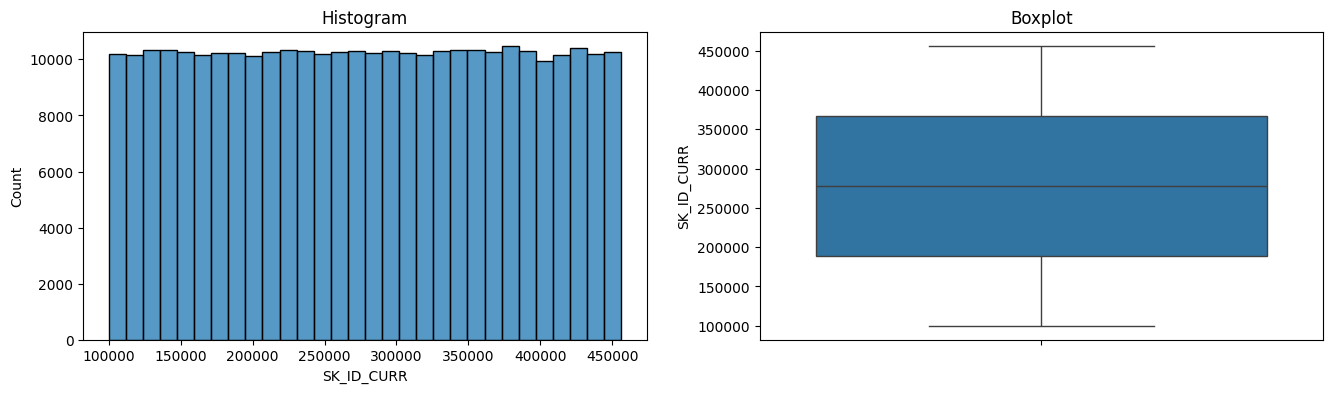

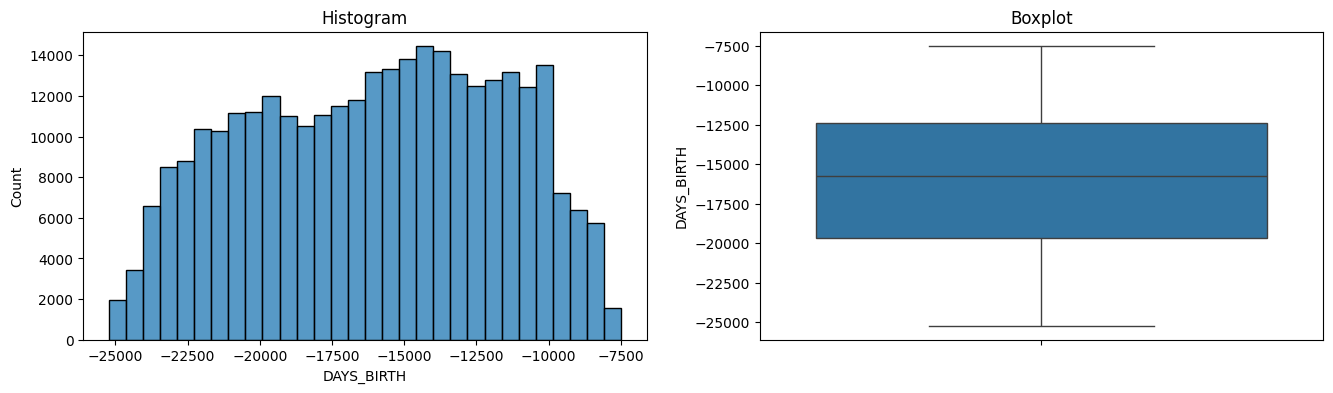

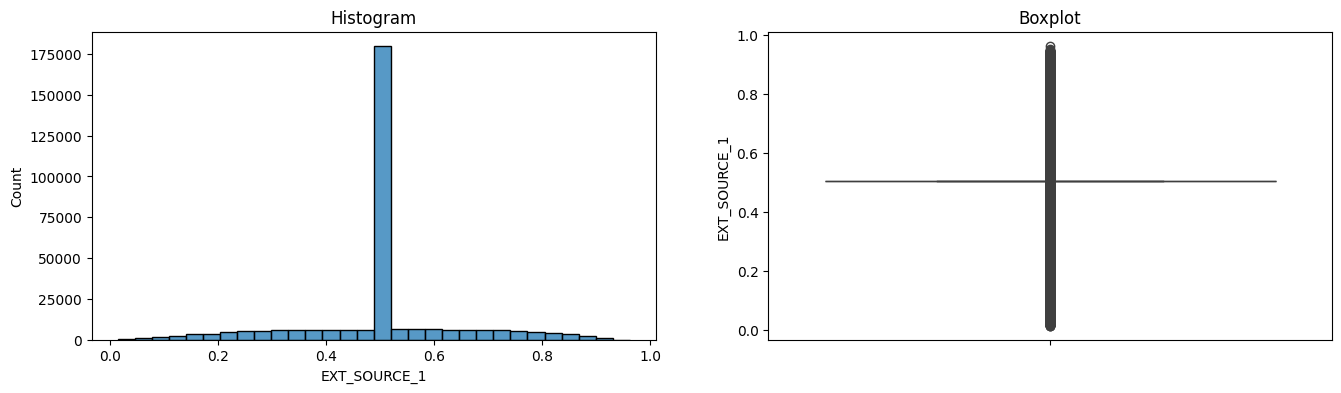

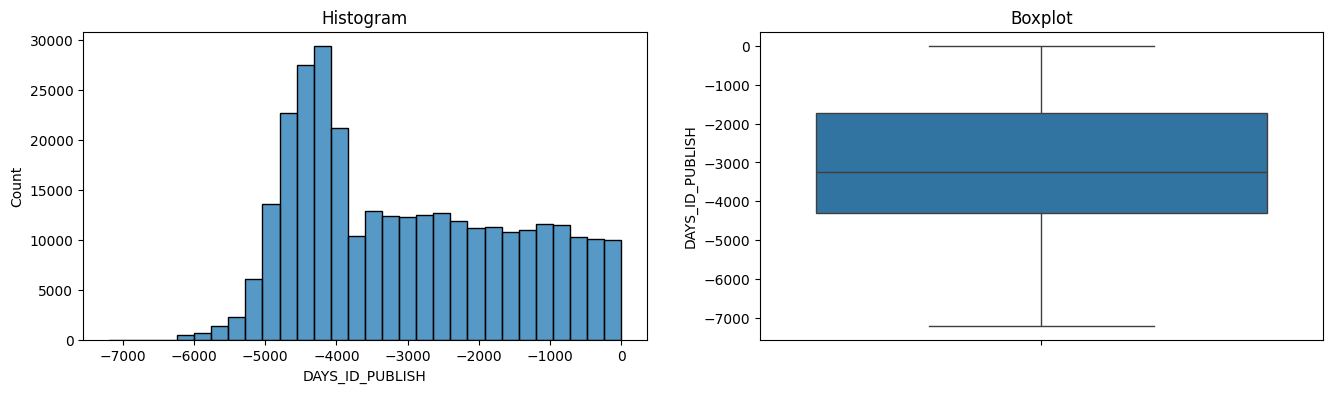

In [21]:
# Menampilkan visualisasi distribusi normal dengan boxplot
diagnostic_plots(X_train_nor, 'SK_ID_CURR')
diagnostic_plots(X_train_nor, 'DAYS_BIRTH')
diagnostic_plots(X_train_nor, 'EXT_SOURCE_1')
diagnostic_plots(X_train_nor, 'DAYS_ID_PUBLISH')

Pada kolom-kolom distribusi normal tidak perlu dilakukan handling outlier karena dianggap sebagai outlier natural, ketika di cek tidak ada outliernya. Distribusi normal memiliki pembagian simetris di sekitar nilai rata-ratanya. Oleh karena itu, nilai ekstrem di satu sisi cenderung seimbang dengan nilai ekstrem di sisi lainnya, yang mengurangi efek dari outlier terhadap statistik deskriptif seperti rata-rata dan standar deviasi.

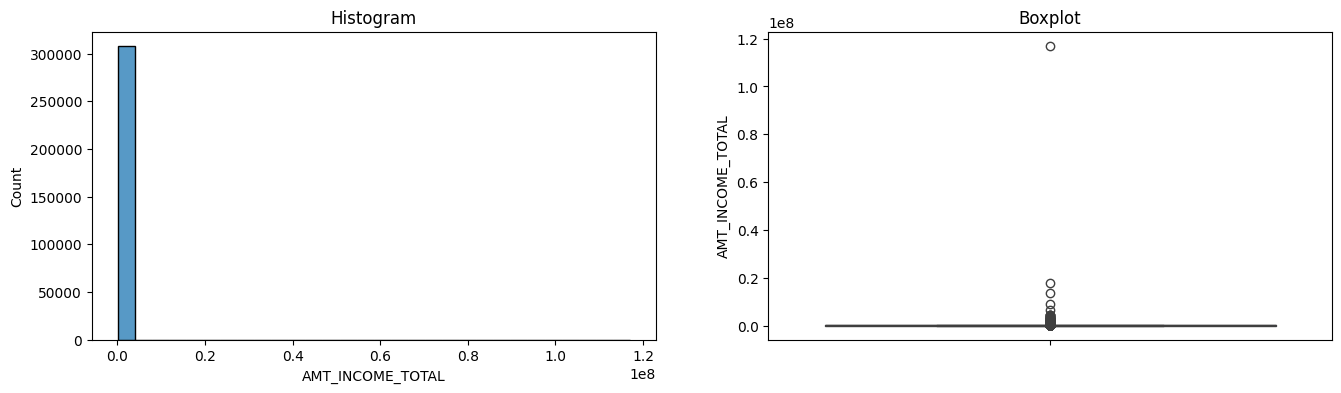

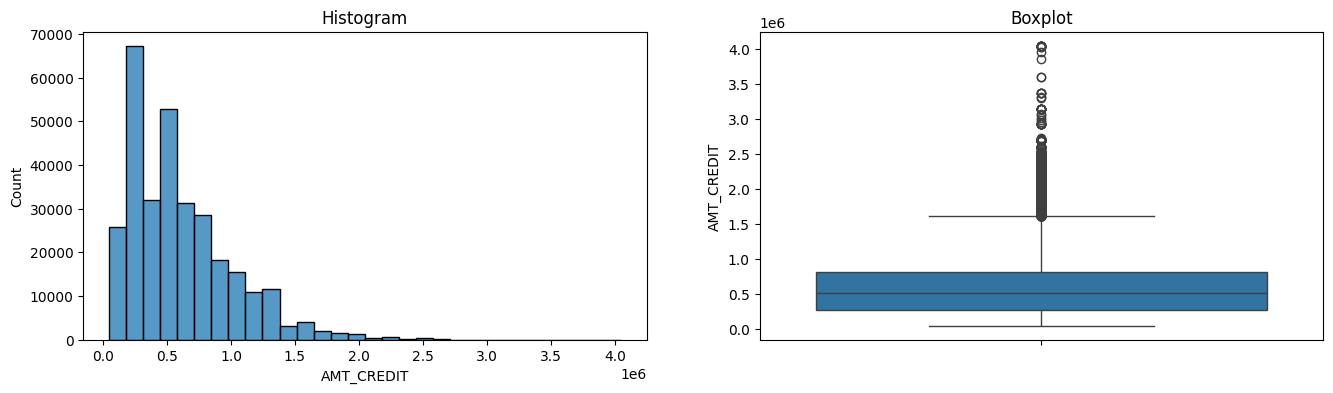

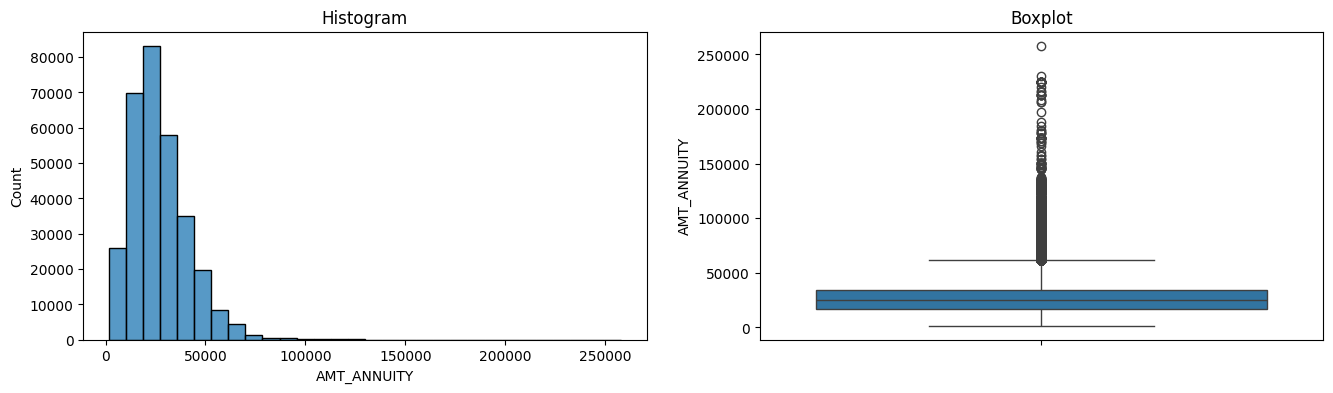

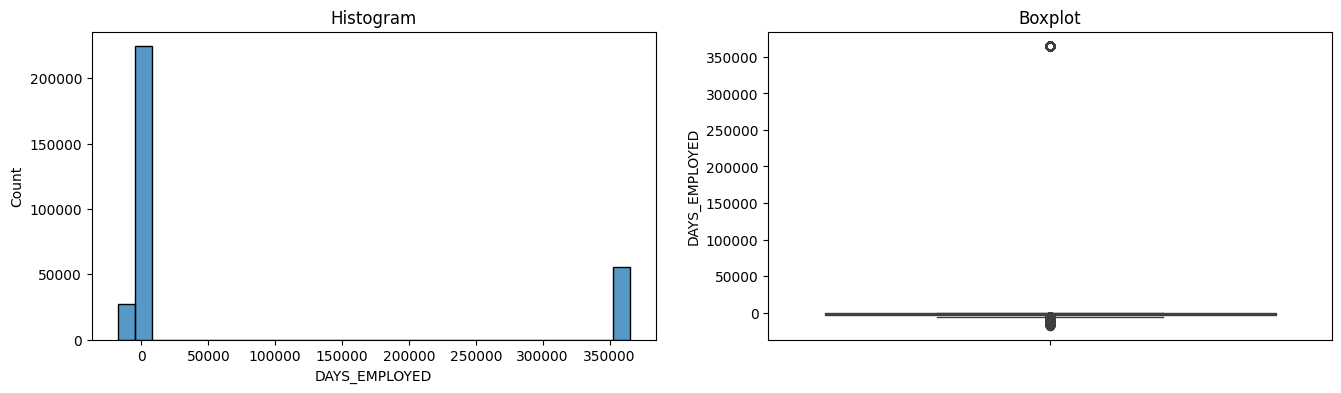

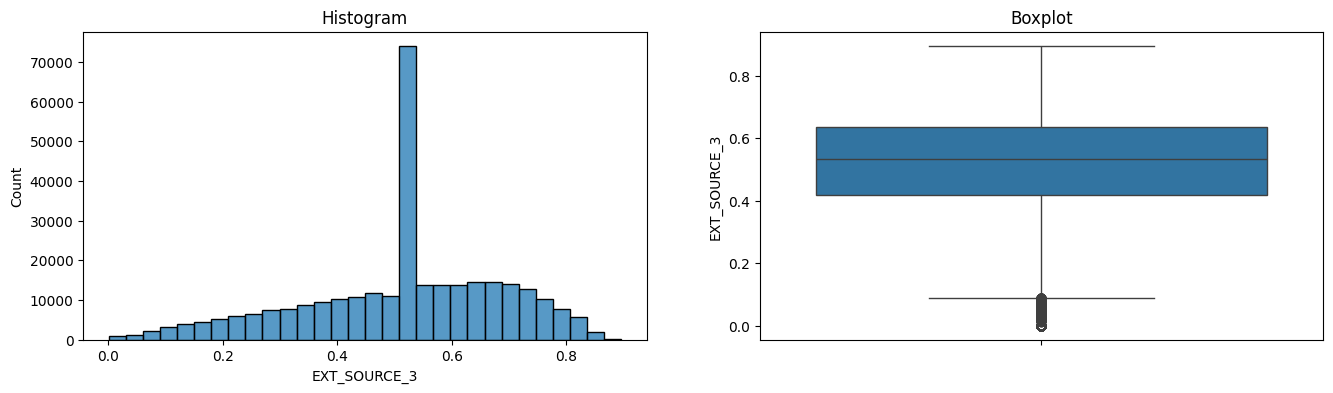

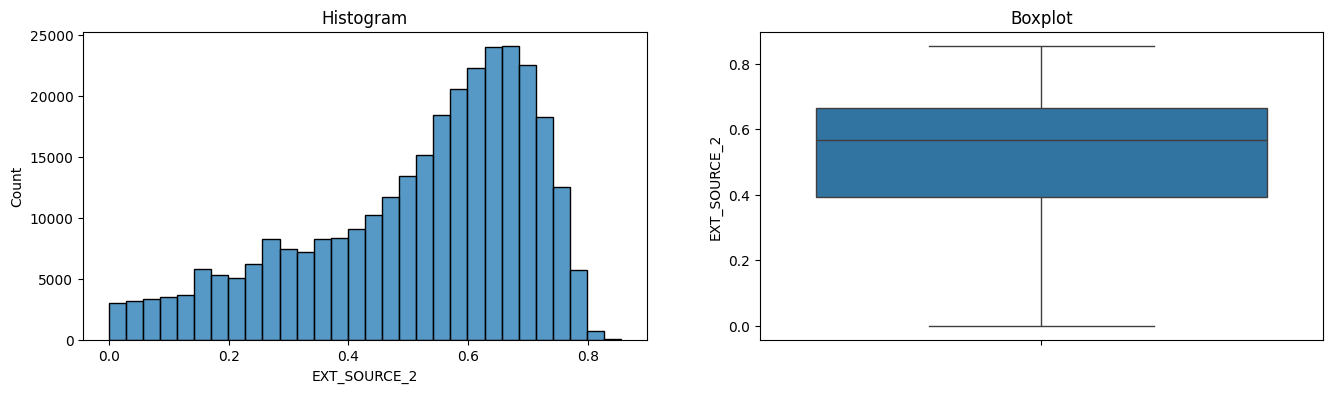

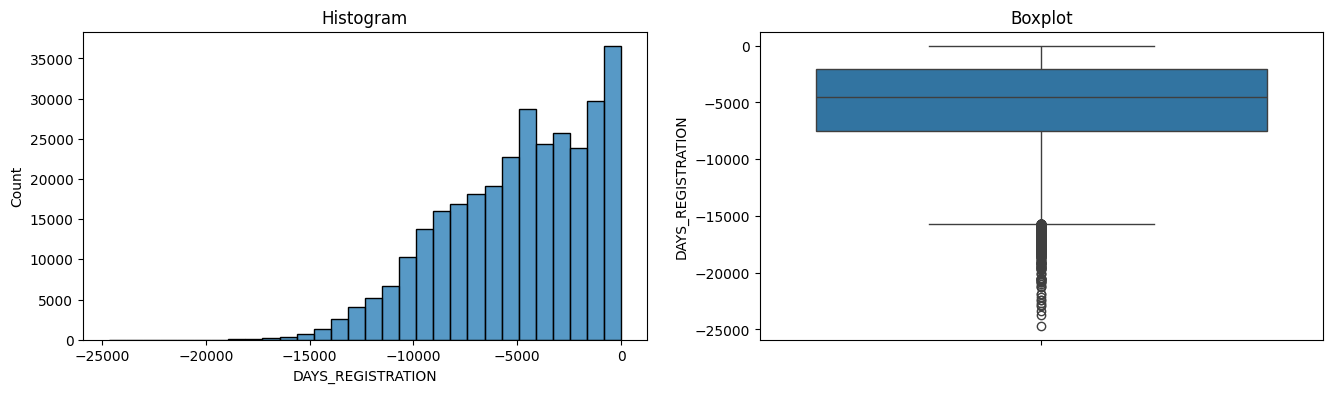

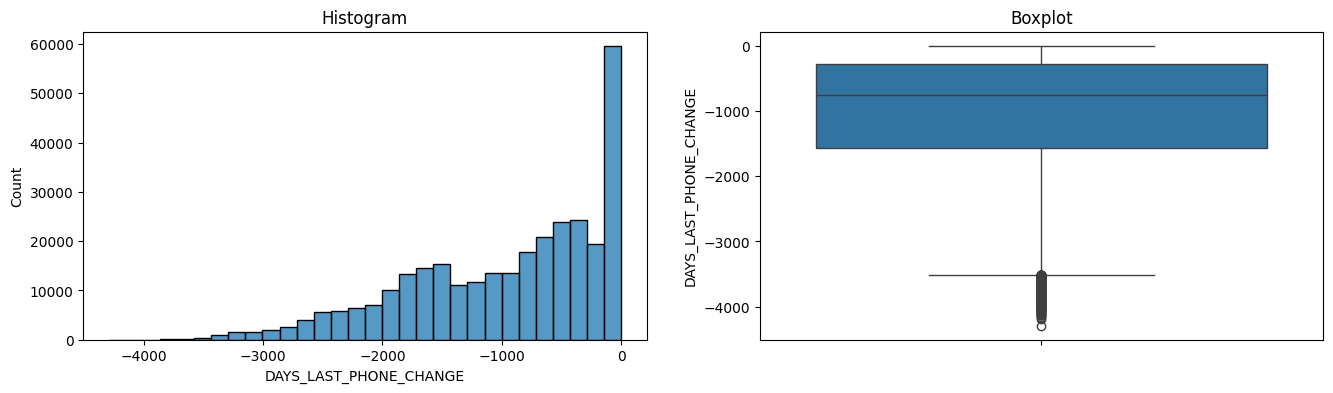

In [22]:
# Menampilkan visualisasi distribusi skew dengan boxplot before handling outlier
diagnostic_plots(X_train_skew, 'AMT_INCOME_TOTAL')
diagnostic_plots(X_train_skew, 'AMT_CREDIT')
diagnostic_plots(X_train_skew, 'AMT_ANNUITY')
diagnostic_plots(X_train_skew, 'DAYS_EMPLOYED')
diagnostic_plots(X_train_skew, 'EXT_SOURCE_3')
diagnostic_plots(X_train_skew, 'EXT_SOURCE_2')
diagnostic_plots(X_train_skew, 'DAYS_REGISTRATION')
diagnostic_plots(X_train_skew, 'DAYS_LAST_PHONE_CHANGE')

Karena terdapat outlier pada kolom-kolom distribusi skew, sehingga perlu dilakukan handling outlier mengguankan metode capping

In [23]:
# Capping the skewed distribution

winsoriser_s = Winsorizer(capping_method='iqr',
                             tail='both',
                             fold=3,
                             variables=['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'DAYS_EMPLOYED', 'EXT_SOURCE_3', 
                                        'EXT_SOURCE_2', 'DAYS_REGISTRATION', 'DAYS_LAST_PHONE_CHANGE'])

X_train_capped_s = winsoriser_s.fit_transform(X_train_skew)

In [24]:
# Untuk melihat apakah distribusi normal atau skewness 
print('Distribution of column AMT_INCOME_TOTAL  : ', X_train['AMT_INCOME_TOTAL'].skew())
print('Distribution of column AMT_CREDIT  : ', X_train['AMT_CREDIT'].skew())
print('Distribution of column AMT_ANNUITY  : ', X_train['AMT_ANNUITY'].skew())
print('Distribution of column DAYS_EMPLOYED  : ', X_train['DAYS_EMPLOYED'].skew())
print('Distribution of column EXT_SOURCE_3  : ', X_train['EXT_SOURCE_3'].skew())
print('Distribution of column EXT_SOURCE_2  : ', X_train['EXT_SOURCE_2'].skew())
print('Distribution of column DAYS_REGISTRATION  : ', X_train['DAYS_REGISTRATION'].skew())
print('Distribution of column DAYS_LAST_PHONE_CHANGE  : ', X_train['DAYS_LAST_PHONE_CHANGE'].skew())

Distribution of column AMT_INCOME_TOTAL  :  368.3078905971151
Distribution of column AMT_CREDIT  :  1.2254257469429275
Distribution of column AMT_ANNUITY  :  1.6146496558306838
Distribution of column DAYS_EMPLOYED  :  1.6613450505048135
Distribution of column EXT_SOURCE_3  :  -0.5364265215804269
Distribution of column EXT_SOURCE_2  :  -0.7964169591667506
Distribution of column DAYS_REGISTRATION  :  -0.5876448033664685
Distribution of column DAYS_LAST_PHONE_CHANGE  :  -0.714508124474249


In [25]:
# Cek nilai distribusi skewness setelah di handling outlier
print('Distribution of column AMT_INCOME_TOTAL  : ', X_train_capped_s['AMT_INCOME_TOTAL'].skew())
print('Distribution of column AMT_CREDIT  : ', X_train_capped_s['AMT_CREDIT'].skew())
print('Distribution of column AMT_ANNUITY  : ', X_train_capped_s['AMT_ANNUITY'].skew())
print('Distribution of column DAYS_EMPLOYED  : ', X_train_capped_s['DAYS_EMPLOYED'].skew())
print('Distribution of column EXT_SOURCE_3  : ', X_train_capped_s['EXT_SOURCE_3'].skew())
print('Distribution of column EXT_SOURCE_2  : ', X_train_capped_s['EXT_SOURCE_2'].skew())
print('Distribution of column DAYS_REGISTRATION  : ', X_train_capped_s['DAYS_REGISTRATION'].skew())
print('Distribution of column DAYS_LAST_PHONE_CHANGE  : ', X_train_capped_s['DAYS_LAST_PHONE_CHANGE'].skew())

Distribution of column AMT_INCOME_TOTAL  :  1.350180277326815
Distribution of column AMT_CREDIT  :  1.1881094697263457
Distribution of column AMT_ANNUITY  :  1.060978305487161
Distribution of column DAYS_EMPLOYED  :  0.6300409078878579
Distribution of column EXT_SOURCE_3  :  -0.53769669691455
Distribution of column EXT_SOURCE_2  :  -0.7959400362910248
Distribution of column DAYS_REGISTRATION  :  -0.590815681485009
Distribution of column DAYS_LAST_PHONE_CHANGE  :  -0.713608991172661


Setelah dilakukan handling outlier pada kolom-kolom skew, selanjutnya dibandingkan antara nilai sebelum dihandling outlier dg setelah di handling outlier.

## 3.5 - Handling Missing Values

In [26]:
# Check X_train
X_train.isnull().sum()

SK_ID_CURR                0
AMT_INCOME_TOTAL          0
AMT_CREDIT                0
AMT_ANNUITY               0
DAYS_BIRTH                0
EXT_SOURCE_1              0
EXT_SOURCE_3              0
EXT_SOURCE_2              0
DAYS_ID_PUBLISH           0
DAYS_REGISTRATION         0
OCCUPATION_TYPE           0
DAYS_LAST_PHONE_CHANGE    0
DAYS_EMPLOYED             0
dtype: int64

In [27]:
# Check X_test
X_test.isnull().sum()

SK_ID_CURR                0
AMT_INCOME_TOTAL          0
AMT_CREDIT                0
AMT_ANNUITY               0
DAYS_BIRTH                0
EXT_SOURCE_1              0
EXT_SOURCE_3              0
EXT_SOURCE_2              0
DAYS_ID_PUBLISH           0
DAYS_REGISTRATION         0
OCCUPATION_TYPE           0
DAYS_LAST_PHONE_CHANGE    0
DAYS_EMPLOYED             0
dtype: int64

In [28]:
# Check y_train
y_train.isnull().sum()

0

In [29]:
# Check y_test
y_test.isnull().sum()

0

**Statement** : Pada X_train, X_test, y_train & y_test tidak terdapat missing value.

## 3.7 - Split numerical column and categorical column

In [30]:
num_col_n = ['SK_ID_CURR', 'DAYS_BIRTH', 'EXT_SOURCE_1', 'DAYS_ID_PUBLISH']
num_col_s = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'DAYS_EMPLOYED', 'EXT_SOURCE_3', 
             'EXT_SOURCE_2', 'DAYS_REGISTRATION', 'DAYS_LAST_PHONE_CHANGE']
cat_col = ['OCCUPATION_TYPE']

In [31]:
# Split between num col and cat col in Train and Test set

X_train_num_n = X_train[num_col_n]
X_train_num_s = X_train[num_col_s]
X_train_cat = X_train[cat_col]

X_test_num_n = X_test[num_col_n]
X_test_num_s = X_test[num_col_s]
X_test_cat = X_test[cat_col]

In [32]:
# Show train-set Fitur
display(X_train_num_n.head())
display(X_train_num_s.head())
display(X_train_cat.head())

,SK_ID_CURR,DAYS_BIRTH,EXT_SOURCE_1,DAYS_ID_PUBLISH
22973,126731,-22555,0.786108,-4326
229678,366022,-19279,0.626384,-2826
1237,101460,-16893,0.505998,-414
240062,377981,-11745,0.505998,-1236
33320,138606,-15422,0.505998,-4846


,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,DAYS_EMPLOYED,EXT_SOURCE_3,EXT_SOURCE_2,DAYS_REGISTRATION,DAYS_LAST_PHONE_CHANGE
22973,45000.0,191880.0,18819.0,365243,0.617826,0.157320,-10407.0,0.0
229678,180000.0,450000.0,20979.0,-430,0.662638,0.556581,-5438.0,-503.0
1237,85500.0,454500.0,23337.0,-284,0.535276,0.591165,-4262.0,-1530.0
240062,202500.0,755190.0,36459.0,-1034,0.486653,0.238699,-6010.0,-1040.0
33320,252000.0,1159411.5,46111.5,-1008,0.477649,0.466012,-4428.0,-714.0


,OCCUPATION_TYPE
22973,unknown
229678,Laborers
1237,Cleaning staff
240062,Sales staff
33320,Managers


In [33]:
# Show Test-set Fitur
display(X_test_num_n.head())
display(X_test_num_s.head())
display(X_test_cat.head())

,SK_ID_CURR,DAYS_BIRTH,EXT_SOURCE_1,DAYS_ID_PUBLISH
49103,156852,-11222,0.397810,-2527
96031,211489,-18005,0.445130,-1456
300915,448618,-22581,0.505998,-5098
260145,401051,-18573,0.633743,-2092
99054,215007,-13238,0.636607,-4044


,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,DAYS_EMPLOYED,EXT_SOURCE_3,EXT_SOURCE_2,DAYS_REGISTRATION,DAYS_LAST_PHONE_CHANGE
49103,126000.0,888840.0,32053.5,-721,0.310818,0.523258,-5197.0,-1493.0
96031,225000.0,360000.0,30798.0,-2354,0.535276,0.577334,-4816.0,-1587.0
300915,126000.0,312768.0,23382.0,365243,0.551381,0.732679,-5099.0,-587.0
260145,225000.0,1096020.0,55962.0,-2575,0.347418,0.498608,-8186.0,-2062.0
99054,270000.0,1288350.0,37800.0,-125,0.221335,0.341010,-7362.0,-683.0


,OCCUPATION_TYPE
49103,Core staff
96031,Drivers
300915,unknown
260145,Security staff
99054,Laborers


## 3.8 - Feature Scaling

### 3.7.1 Scaling Normal

In [34]:
# Kolom tipe numerical yg distribusi Normal di scaling menggunakan StandardScaler

scaler_n = StandardScaler()
scaler_n.fit(X_train_num_n)

StandardScaler()

In [35]:
X_train_num_scaler_n = scaler_n.transform(X_train_num_n)
X_test_num_scaler_n = scaler_n.transform(X_test_num_n)

display(X_train_num_scaler_n)
display(X_test_num_scaler_n)

array([[-1.47385454, -1.49259263,  2.01941948, -0.88279751],
       [ 0.85369463, -0.74207289,  0.87471906,  0.11064007],
       [-1.71966192, -0.19544893,  0.01194498,  1.70808769],
       ...,
       [-0.65189627, -1.63715245,  2.70251727, -0.91524981],
       [ 0.55806629, -0.31457904,  0.70870742,  1.3550862 ],
       [-0.59458564, -1.00026451,  0.01194498, -0.50661582]])

array([[-1.1808719 ,  1.10375665, -0.76340804,  0.30866529],
       [-0.64942565, -0.4502041 , -0.42427838,  1.01797972],
       [ 1.65709405, -1.49854914,  0.01194498, -1.39408672],
       ...,
       [ 0.42309643,  0.9039846 , -0.41543547, -0.63841187],
       [-1.40083503, -0.96200541,  0.01194498,  0.00666027],
       [-0.25972888, -1.34849101,  0.01194498, -0.70199187]])

### 3.7.2 - Scaling Skew

In [36]:
# Kolom tipe numerical yg distribusi skew maka scaling menggunakan MinMaxScaler.
scaler_s = MinMaxScaler()
scaler_s.fit(X_train_num_s)

MinMaxScaler()

In [37]:
X_train_num_scaler_s = scaler_s.transform(X_train_num_s)
X_test_num_scaler_s = scaler_s.transform(X_test_num_s)

display(X_train_num_scaler_s)
display(X_test_num_scaler_s)

array([[1.65420881e-04, 3.66741573e-02, 6.70937171e-02, ...,
        1.83999652e-01, 5.78185798e-01, 1.00000000e+00],
       [1.31952005e-03, 1.01123596e-01, 7.55177255e-02, ...,
        6.50972618e-01, 7.79588197e-01, 8.82805219e-01],
       [5.11650631e-04, 1.02247191e-01, 8.47139347e-02, ...,
        6.91420990e-01, 8.27253567e-01, 6.43522833e-01],
       ...,
       [5.50120603e-04, 1.22471910e-01, 8.26956827e-02, ...,
        4.01986134e-01, 8.10919261e-01, 9.95340168e-01],
       [1.12717019e-03, 1.90674157e-01, 9.59459459e-02, ...,
        6.34061779e-01, 7.42785344e-01, 1.00000000e+00],
       [3.57770742e-04, 1.02247191e-01, 5.13864514e-02, ...,
        7.54014861e-01, 4.78234436e-01, 5.36579683e-01]])

array([[8.57880381e-04, 2.10696629e-01, 1.18708319e-01, ...,
        6.11997467e-01, 7.89356355e-01, 6.52143523e-01],
       [1.70421977e-03, 7.86516854e-02, 1.13811864e-01, ...,
        6.75244840e-01, 8.04798962e-01, 6.30242311e-01],
       [8.57880381e-04, 6.68584270e-02, 8.48894349e-02, ...,
        8.56934516e-01, 7.93328470e-01, 8.63233924e-01],
       ...,
       [7.42470465e-04, 4.49438202e-02, 3.90136890e-02, ...,
        8.29638281e-01, 7.64672503e-01, 7.66542404e-01],
       [7.42470465e-04, 3.13707865e-02, 1.92874693e-02, ...,
        4.10328356e-01, 5.69836252e-01, 1.00000000e+00],
       [9.34820326e-04, 1.92020225e-01, 9.66128466e-02, ...,
        4.32197385e-01, 9.94771401e-01, 8.05684995e-01]])

## 3.9 - Feature Encoding

In [38]:
# Karena semua colom categorical nominal, maka endocoding menggunakan OneHotEncoder
encoder = OneHotEncoder(sparse=False)

encoder.fit(X_train_cat)

OneHotEncoder(sparse=False, sparse_output=False)

In [39]:
# transform features with encoder
X_train_cat_encoded_n = encoder.transform(X_train_cat)
X_test_cat_encoded_n = encoder.transform(X_test_cat)

display(X_train_cat_encoded_n)
display(X_test_cat_encoded_n)

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## 3.10 - Merge (concat) data

In [40]:
# concatencate them
X_train_final = np.concatenate([X_train_num_scaler_n, X_train_num_scaler_s, X_train_cat_encoded_n],axis=1)
X_test_final = np.concatenate([X_test_num_scaler_n, X_test_num_scaler_s, X_test_cat_encoded_n],axis=1)
X_train_final[0]

array([-1.47385454e+00, -1.49259263e+00,  2.01941948e+00, -8.82797511e-01,
        1.65420881e-04,  3.66741573e-02,  6.70937171e-02,  1.00000000e+00,
        6.90916900e-01,  1.83999652e-01,  5.78185798e-01,  1.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  1.00000000e+00])

In [41]:
X_train_final.shape

(246008, 31)

In [42]:
X_test_final.shape

(61503, 31)

## 3.11 - Imbalance Handling with SMOTE

Dilakukan pengecekan pada kolom target, dapat dilihat bawah antara nilai target 0 dan 1 jumlahnya berbeda, dan sebelumnya juga dianalisa pada EDA bahwa perbandingan kolom target 1:13, sehingga perlu dilakukan imbalance handling.

In [43]:
# Inisialisasi SMOTE
smote = SMOTE(sampling_strategy='auto')

# Oversampling menggunakan SMOTE pada data pelatihan
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_final, y_train)

# Pastikan bahwa jumlah sampel di x_train dan y_train seimbang
assert len(X_train_balanced) == len(y_train_balanced)

In [44]:
y_train_balanced.value_counts()

TARGET
0    226136
1    226136
Name: count, dtype: int64

Setelah dilakukan imbalance handling, dapat dilihat data menjadi seimbang nilai 0 dan 1 sebanyak 226136

# 4. Model Definition & Training

## 4.1 - Model Logistic Regression

In [45]:
# Define the model Logistic Regression
logreg_model = LogisticRegression()

In [46]:
# Train the model
logreg_model.fit(X_train_balanced, y_train_balanced)

LogisticRegression()

## 4.2 - Model KNN

In [47]:
# Define the model KNN
knn_model = KNeighborsClassifier()

In [48]:
# Train the model KNN
knn_model.fit(X_train_balanced, y_train_balanced)

KNeighborsClassifier()

## 4.3 - Model Decision Tree

In [49]:
# Define the model
model_dt = DecisionTreeClassifier()

In [50]:
# Train the model
model_dt.fit(X_train_balanced, y_train_balanced)

DecisionTreeClassifier()

## 4.4 - Model Random Forest

In [51]:
# Define the model
model_rf = RandomForestClassifier()

In [52]:
# Train the model
model_rf.fit(X_train_balanced, y_train_balanced)

RandomForestClassifier()

## 4.5 - Model Adaboost

In [53]:
# Define the model
model_ada = AdaBoostClassifier()

In [54]:
# Train the model
model_ada.fit(X_train_balanced, y_train_balanced)

AdaBoostClassifier()

# 5. Model Evaluation

In [55]:
# # Save Classification Report into a Dictionary

# all_reports = {}
# def performance_report(all_reports, y_train_balanced, y_pred_train, y_test, y_pred_test, name):
#   score_reports = {
#       'train - precision' : precision_score(y_train_balanced, y_pred_train, average= 'weighted'),
#       'train - recall' : recall_score(y_train_balanced, y_pred_train, average= 'weighted'),
#       'train - accuracy' : accuracy_score(y_train_balanced, y_pred_train),
#       'train - f1_score' : f1_score(y_train_balanced, y_pred_train, average= 'weighted'),
#       'test - precision' : precision_score(y_test, y_pred_test, average= 'weighted'),
#       'test - recall' : recall_score(y_test, y_pred_test, average= 'weighted'),
#       'test - accuracy_score' : accuracy_score(y_test, y_pred_test),
#       'test - f1_score' : f1_score(y_test, y_pred_test, average= 'weighted'),
#   }
#   all_reports[name] = score_reports
#   return all_reports

In [59]:
all_reports = {}
def performance_report(all_reports, y_train_balanced, y_pred_train, y_test, y_pred_test, name, f1_cv_scores=None):
    score_reports = {
        'train - precision': precision_score(y_train_balanced, y_pred_train, average='weighted'),
        'train - recall': recall_score(y_train_balanced, y_pred_train, average='weighted'),
        'train - accuracy': accuracy_score(y_train_balanced, y_pred_train),
        'train - f1_score': f1_score(y_train_balanced, y_pred_train, average='weighted'),
        'test - precision': precision_score(y_test, y_pred_test, average='weighted'),
        'test - recall': recall_score(y_test, y_pred_test, average='weighted'),
        'test - accuracy': accuracy_score(y_test, y_pred_test),
        'test - f1_score': f1_score(y_test, y_pred_test, average='weighted'),
    }
    
    if f1_cv_scores is not None:
        score_reports['cv - f1_score_mean'] = np.mean(f1_cv_scores)
        score_reports['cv - f1_score_std'] = np.std(f1_cv_scores)
        score_reports['cv - f1_score_range'] = (np.mean(f1_cv_scores) - np.std(f1_cv_scores), np.mean(f1_cv_scores) + np.std(f1_cv_scores))
    
    all_reports[name] = score_reports
    return all_reports

## 5.1 Model Evaluation KNN

Classification Report : 
               precision    recall  f1-score   support

           0       1.00      0.80      0.89    226136
           1       0.83      1.00      0.91    226136

    accuracy                           0.90    452272
   macro avg       0.92      0.90      0.90    452272
weighted avg       0.92      0.90      0.90    452272
 

Classification Report : 
               precision    recall  f1-score   support

           0       0.93      0.72      0.81     56550
           1       0.11      0.41      0.18      4953

    accuracy                           0.70     61503
   macro avg       0.52      0.57      0.50     61503
weighted avg       0.87      0.70      0.76     61503
 

Confusion Matrix - Test Set : 
 [[40835 15715]
 [ 2919  2034]] 



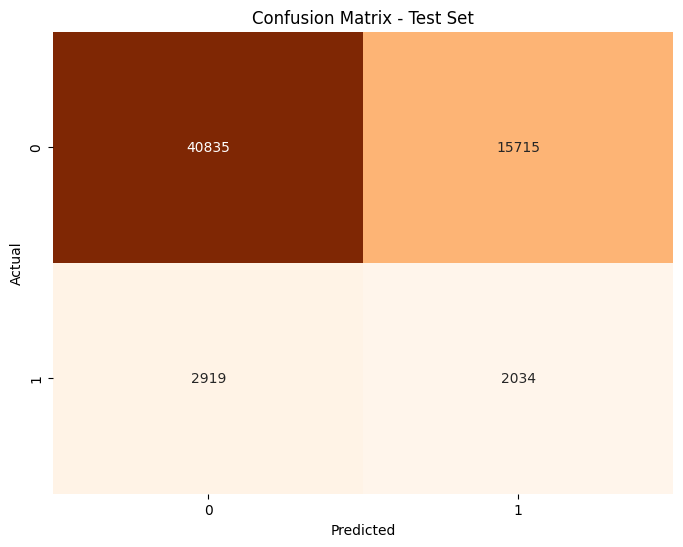

In [57]:
# Predict Train and Test set
y_train_pred_knn = knn_model.predict(X_train_balanced)
y_test_pred_knn = knn_model.predict(X_test_final)

# Check Performance Baseline Model against Train-Set
print('Classification Report : \n', classification_report(y_train_balanced, y_train_pred_knn), '\n')

# Check Performance Baseline Model against Test-Set
print('Classification Report : \n', classification_report(y_test, y_test_pred_knn), '\n')
print('Confusion Matrix - Test Set : \n', confusion_matrix(y_test, y_test_pred_knn), '\n')

# Visualize Confusion Matrix - Test Set
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_test_pred_knn), annot=True, cmap='Oranges', fmt='g', cbar=False)
plt.title('Confusion Matrix - Test Set')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [61]:
f1_train_cross_val_knn = cross_val_score(knn_model, 
                                               X_train_balanced, 
                                               y_train_balanced,
                                               cv=3,
                                               scoring="f1")

In [62]:
# Performance_report dengan hasil cross-validation KNN
all_reports = performance_report(all_reports, y_train_balanced, y_train_pred_knn, y_test, y_test_pred_knn, "KNN (Baseline)", f1_cv_scores=f1_train_cross_val_knn)
pd.DataFrame(all_reports)

,KNN (Baseline)
cv - f1_score_mean,0.860235
cv - f1_score_range,"(0.8590703933199215, 0.8614005551537476)"
cv - f1_score_std,0.001165
test - accuracy,0.697023
test - f1_score,0.763084
test - precision,0.867355
test - recall,0.697023
train - accuracy,0.898667
train - f1_score,0.897637
train - precision,0.915392


## 5.2 Model Evaluation Logistic Regression

Classification Report : 
               precision    recall  f1-score   support

           0       0.67      0.68      0.68    226136
           1       0.68      0.67      0.67    226136

    accuracy                           0.68    452272
   macro avg       0.68      0.68      0.68    452272
weighted avg       0.68      0.68      0.68    452272
 

Classification Report : 
               precision    recall  f1-score   support

           0       0.96      0.68      0.80     56550
           1       0.15      0.65      0.24      4953

    accuracy                           0.68     61503
   macro avg       0.55      0.66      0.52     61503
weighted avg       0.89      0.68      0.75     61503
 

Confusion Matrix - Test Set : 
 [[38470 18080]
 [ 1752  3201]] 



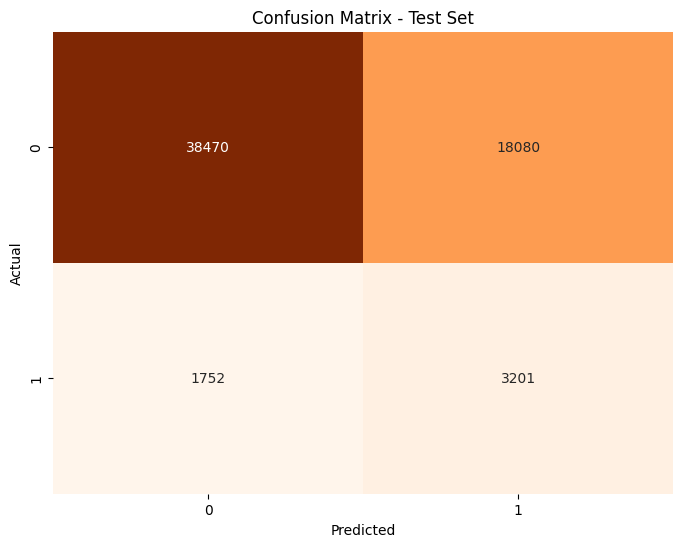

In [63]:
# Predict Train and Test set
y_train_pred_logreg = logreg_model.predict(X_train_balanced)
y_test_pred_logreg = logreg_model.predict(X_test_final)

# Check Performance Baseline Model against Train-Set
print('Classification Report : \n', classification_report(y_train_balanced, y_train_pred_logreg), '\n')

# Check Performance Baseline Model against Test-Set
print('Classification Report : \n', classification_report(y_test, y_test_pred_logreg), '\n')
print('Confusion Matrix - Test Set : \n', confusion_matrix(y_test, y_test_pred_logreg), '\n')

# Visualize Confusion Matrix - Test Set
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_test_pred_logreg), annot=True, cmap='Oranges', fmt='g', cbar=False)
plt.title('Confusion Matrix - Test Set')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [64]:
# Menghitung cross-validation score menggunakan f1 sebagai metrik
f1_train_cross_val_logreg = cross_val_score(logreg_model,
                                                  X_train_balanced,
                                                  y_train_balanced,
                                                  cv=3,
                                                  scoring="f1")

In [65]:
# Performance_report dengan hasil cross-validation Logistic regression
all_reports = performance_report(all_reports, y_train_balanced, y_train_pred_logreg, y_test, y_test_pred_logreg, "LogReg (Baseline)", f1_cv_scores=f1_train_cross_val_logreg)
pd.DataFrame(all_reports)

,KNN (Baseline),LogReg (Baseline)
train - precision,0.915392,0.675701
train - recall,0.898667,0.675658
train - accuracy,0.898667,0.675658
train - f1_score,0.897637,0.675638
test - precision,0.867355,0.89153
test - recall,0.697023,0.677544
test - accuracy,0.697023,0.677544
test - f1_score,0.763084,0.750689
cv - f1_score_mean,0.860235,0.673058
cv - f1_score_std,0.001165,0.001504


## 5.3 Model Evaluation Decision Tree

Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    226136
           1       1.00      1.00      1.00    226136

    accuracy                           1.00    452272
   macro avg       1.00      1.00      1.00    452272
weighted avg       1.00      1.00      1.00    452272
 

Classification Report : 
               precision    recall  f1-score   support

           0       0.93      0.82      0.87     56550
           1       0.12      0.27      0.16      4953

    accuracy                           0.78     61503
   macro avg       0.52      0.54      0.52     61503
weighted avg       0.86      0.78      0.81     61503
 

Confusion Matrix - Test Set : 
 [[46429 10121]
 [ 3633  1320]] 



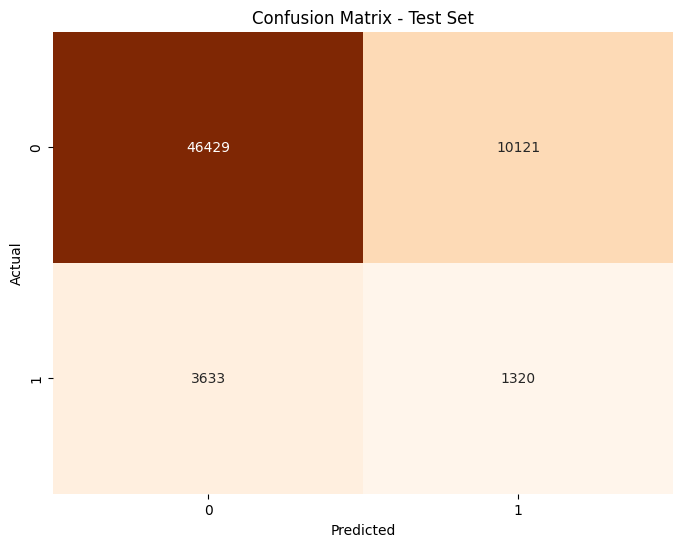

In [66]:
# Predict Train and Test set
y_train_pred_dt = model_dt.predict(X_train_balanced)
y_test_pred_dt = model_dt.predict(X_test_final)

# Check Performance Baseline Model against Train-Set
print('Classification Report : \n', classification_report(y_train_balanced, y_train_pred_dt), '\n')

# Check Performance Baseline Model against Test-Set
print('Classification Report : \n', classification_report(y_test, y_test_pred_dt), '\n')
print('Confusion Matrix - Test Set : \n', confusion_matrix(y_test, y_test_pred_dt), '\n')

# Visualize Confusion Matrix - Test Set
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_test_pred_dt), annot=True, cmap='Oranges', fmt='g', cbar=False)
plt.title('Confusion Matrix - Test Set')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [67]:
f1_train_cross_val_dt = cross_val_score(model_dt,
                                              X_train_balanced,
                                              y_train_balanced,
                                              cv=3,
                                              scoring="f1")

In [68]:
# Performance_report dengan hasil cross-validation DT
all_reports = performance_report(all_reports, y_train_balanced, y_train_pred_dt, y_test, y_test_pred_dt, "Decision Tree (Baseline)", f1_cv_scores=f1_train_cross_val_dt)
pd.DataFrame(all_reports)

,KNN (Baseline),LogReg (Baseline),Decision Tree (Baseline)
train - precision,0.915392,0.675701,1.0
train - recall,0.898667,0.675658,1.0
train - accuracy,0.898667,0.675658,1.0
train - f1_score,0.897637,0.675638,1.0
test - precision,0.867355,0.89153,0.862033
test - recall,0.697023,0.677544,0.776369
test - accuracy,0.697023,0.677544,0.776369
test - f1_score,0.763084,0.750689,0.813816
cv - f1_score_mean,0.860235,0.673058,0.817277
cv - f1_score_std,0.001165,0.001504,0.022308


## 5.4 Model Evaluation Random Forest

Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    226136
           1       1.00      1.00      1.00    226136

    accuracy                           1.00    452272
   macro avg       1.00      1.00      1.00    452272
weighted avg       1.00      1.00      1.00    452272
 

Classification Report : 
               precision    recall  f1-score   support

           0       0.93      0.90      0.92     56550
           1       0.18      0.25      0.21      4953

    accuracy                           0.85     61503
   macro avg       0.56      0.57      0.56     61503
weighted avg       0.87      0.85      0.86     61503
 

Confusion Matrix - Test Set : 
 [[51016  5534]
 [ 3730  1223]] 



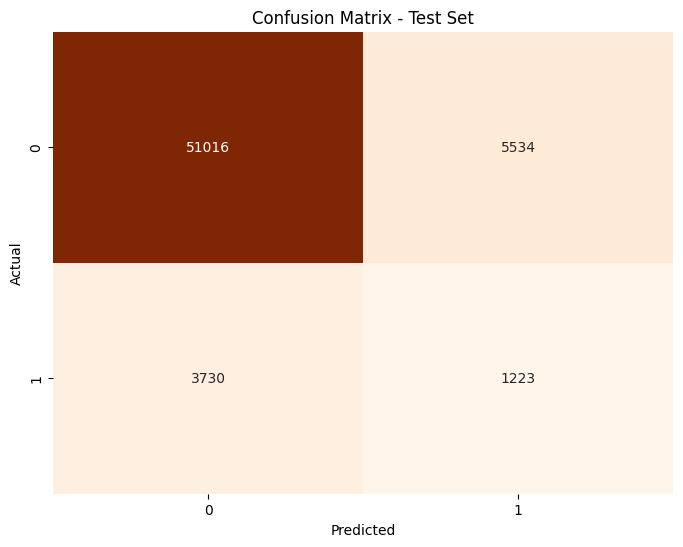

In [69]:
# Predict Train and Test set
y_train_pred_rf = model_rf.predict(X_train_balanced)
y_test_pred_rf = model_rf.predict(X_test_final)

# Check Performance Baseline Model against Train-Set
print('Classification Report : \n', classification_report(y_train_balanced, y_train_pred_rf), '\n')

# Check Performance Baseline Model against Test-Set
print('Classification Report : \n', classification_report(y_test, y_test_pred_rf), '\n')
print('Confusion Matrix - Test Set : \n', confusion_matrix(y_test, y_test_pred_rf), '\n')

# Visualize Confusion Matrix - Test Set
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_test_pred_rf), annot=True, cmap='Oranges', fmt='g', cbar=False)
plt.title('Confusion Matrix - Test Set')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [70]:
f1_train_cross_val_rf = cross_val_score(model_rf,
                                        X_train_balanced,
                                        y_train_balanced,
                                        cv=3,
                                        scoring="f1")

In [71]:
# Performance_report dengan hasil cross-validation Random Forest
all_reports = performance_report(all_reports, y_train_balanced, y_train_pred_rf, y_test, y_test_pred_rf, "RF (Baseline)", f1_cv_scores = f1_train_cross_val_rf)
pd.DataFrame(all_reports)

,KNN (Baseline),LogReg (Baseline),Decision Tree (Baseline),RF (Baseline)
train - precision,0.915392,0.675701,1.0,1.0
train - recall,0.898667,0.675658,1.0,1.0
train - accuracy,0.898667,0.675658,1.0,1.0
train - f1_score,0.897637,0.675638,1.0,1.0
test - precision,0.867355,0.89153,0.862033,0.871398
test - recall,0.697023,0.677544,0.776369,0.849373
test - accuracy,0.697023,0.677544,0.776369,0.849373
test - f1_score,0.763084,0.750689,0.813816,0.859755
cv - f1_score_mean,0.860235,0.673058,0.817277,0.895353
cv - f1_score_std,0.001165,0.001504,0.022308,0.021894


## 5.5 Model Evaluation AdaBoost

Classification Report : 
               precision    recall  f1-score   support

           0       0.76      0.72      0.74    226136
           1       0.73      0.77      0.75    226136

    accuracy                           0.74    452272
   macro avg       0.74      0.74      0.74    452272
weighted avg       0.74      0.74      0.74    452272
 

Classification Report : 
               precision    recall  f1-score   support

           0       0.94      0.71      0.81     56550
           1       0.14      0.52      0.22      4953

    accuracy                           0.70     61503
   macro avg       0.54      0.62      0.51     61503
weighted avg       0.88      0.70      0.77     61503
 

Confusion Matrix - Test Set : 
 [[40419 16131]
 [ 2399  2554]] 



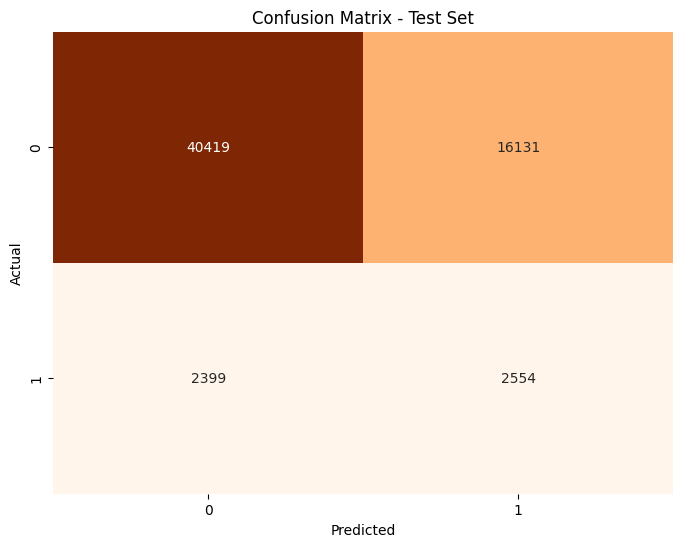

In [72]:
# Predict Train and Test set
y_train_pred_ada = model_ada.predict(X_train_balanced)
y_test_pred_ada = model_ada.predict(X_test_final)

# Check Performance Baseline Model against Train-Set
print('Classification Report : \n', classification_report(y_train_balanced, y_train_pred_ada), '\n')

# Check Performance Baseline Model against Test-Set
print('Classification Report : \n', classification_report(y_test, y_test_pred_ada), '\n')
print('Confusion Matrix - Test Set : \n', confusion_matrix(y_test, y_test_pred_ada), '\n')

# Visualize Confusion Matrix - Test Set
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_test_pred_ada), annot=True, cmap='Oranges', fmt='g', cbar=False)
plt.title('Confusion Matrix - Test Set')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [73]:
f1_train_cross_val_ada = cross_val_score(model_ada,
                                         X_train_balanced,
                                         y_train_balanced,
                                         cv=3,
                                         scoring="f1")

In [74]:
# Performance_report dengan hasil cross-validation Adaboost (Baseline)
all_reports = performance_report(all_reports, y_train_balanced, y_train_pred_ada, y_test, y_test_pred_ada, "Adaboost (Baseline)", f1_cv_scores = f1_train_cross_val_ada)
pd.DataFrame(all_reports)

,KNN (Baseline),LogReg (Baseline),Decision Tree (Baseline),RF (Baseline),Adaboost (Baseline)
train - precision,0.915392,0.675701,1.0,1.0,0.744001
train - recall,0.898667,0.675658,1.0,1.0,0.743378
train - accuracy,0.898667,0.675658,1.0,1.0,0.743378
train - f1_score,0.897637,0.675638,1.0,1.0,0.743214
test - precision,0.867355,0.89153,0.862033,0.871398,0.878959
test - recall,0.697023,0.677544,0.776369,0.849373,0.698714
test - accuracy,0.697023,0.677544,0.776369,0.849373,0.698714
test - f1_score,0.763084,0.750689,0.813816,0.859755,0.765409
cv - f1_score_mean,0.860235,0.673058,0.817277,0.895353,0.749058
cv - f1_score_std,0.001165,0.001504,0.022308,0.021894,0.024008


**MODEL EVALUATION BASELINE MODEL**

Pada kasus dataset Home Credit Default Risk, diharapkan model mampu membedakan antara pelanggan yang akan gagal membayar (1) dan yang lancar atau tidak gagal bayar (0). Positif pada kasus ini adalah 1, yang berarti pelanggan yang gagal membayar kredit. Jika model lebih banyak memprediksi false positive, hal itu dapat merugikan perusahaan karena dapat menyebabkan pelanggan yang rajin membayar menjadi tidak puas dan berpotensi pindah ke lembaga keuangan lain. Di sisi lain, jika model banyak memprediksi false negative, maka perusahaan akan kehilangan potensi pendapatan karena tidak mengidentifikasi pelanggan yang seharusnya mendapat peringatan atau tindakan lebih lanjut. Oleh karena itu, pada kasus ini, penting untuk meminimalkan nilai false negative dan false positive sehingga model mampu memprediksi 0 dan 1 dengan akurat.

Untuk mengevaluasi hal tersebut, kita akan menggunakan nilai f1-score, akurasi, recall, dan presisi. Karena data tidak seimbang, nilai akurasi tidak cukup untuk menilai kinerja model. Pada kasus ini, kami tidak mengharapkan nilai false negative atau false positive yang tinggi. Oleh karena itu, kita akan menggunakan nilai f1-score sebagai metrik utama untuk menilai seberapa baik model dapat membedakan antara 0 dan 1 dengan benar. Semakin tinggi nilai f1-score, semakin baik model dalam menangani keseimbangan antara presisi dan recall, dan semakin akurat model dalam memprediksi default kredit.

Selain itu, kita juga akan mempertimbangkan nilai rata-rata dari cross-validation f1-score (cv - f1_score_mean) sebagai indikator kinerja model secara umum.

Dengan demikian, berikut adalah evaluasi baseline model untuk dataset Home Credit Default Risk:

**KNN BASELINE**

F1 Score: Train = 0.567, Test = 0.523
CV - F1 Score Mean: 0.673
Dari nilai f1-score dan cv - f1_score_mean, model KNN memiliki kinerja yang kompetitif, meskipun sedikit lebih rendah dari SVM di set pengujian. Ini menunjukkan bahwa KNN memiliki kemampuan yang baik dalam menangani keseimbangan antara presisi dan recall, tetapi mungkin sedikit kurang stabil atau kurang sesuai dengan dataset ini dibandingkan dengan SVM.

**Logistic Regression (Baseline)**

F1 Score: Train = 0.391, Test = 0.447
CV - F1 Score Mean: 0.673
Model Logistic Regression memiliki kinerja yang relatif lebih rendah dibandingkan dengan SVM dan KNN di kedua set (train dan test). Ini mungkin menunjukkan bahwa Logistic Regression memiliki kendala dalam menangani keseimbangan antara presisi dan recall pada dataset ini.

**Decision Tree (Baseline)**

F1 Score: Train = 1.0, Test = 0.814
CV - F1 Score Mean: 0.817
Model Decision Tree menunjukkan overfitting yang signifikan pada data pelatihan dengan F1-score sempurna, tetapi kinerja yang lebih rendah di set pengujian menunjukkan bahwa model ini tidak mampu generalisasi dengan baik pada data baru.

**Random Forest (Baseline)**

F1 Score: Train = 1.0, Test = 0.860
CV - F1 Score Mean: 0.895
Random Forest menunjukkan kinerja yang baik dengan F1-score yang tinggi di kedua set, menunjukkan kemampuannya dalam menangani keseimbangan antara presisi dan recall serta kemampuan generalisasi yang baik pada data baru.

**Adaboost (Baseline)**

F1 Score: Train = 0.744, Test = 0.765
CV - F1 Score Mean: 0.749
Adaboost memiliki kinerja yang baik dengan F1-score yang kompetitif di kedua set, menunjukkan kemampuannya dalam meningkatkan kinerja model dasar (weak learner).
Dengan demikian, berdasarkan perbandingan f1-score dan cv - f1_score_mean, model Random Forest (Baseline) kemungkinan merupakan pilihan yang lebih baik di antara lima model untuk dataset Home Credit Default Risk, karena kinerja mereka yang lebih baik dalam menangani keseimbangan antara presisi dan recall serta kemampuan generalisasi yang baik pada data baru.

**MODEL EVALUATION BASELINE MODEL**

Pada kasus ini diharapkan model ini mampu membedakan 0 dan 1. positif pada kasus ini adalah 1 (kartu kredit di default). jika model tersebut lebih banyak memprediksi false positif, maka dapat merugikan perusahan karena jika model menebak diblokir padahal tidak diblokir, maka customer menjadi tidak puas dan dapat menyebabkan customer yang rajin bayar cicilan pindah ke bank/perusahan kredit lain sehingga perusahan mengalami customer tersebut. jika model tersebut banyak menebak false negatif, maka perusahaan juga dapat dirugikan. ketika customer yang sering telat bayar atau melakukan tunggakan dan kartu kreditnya tidak diblokir, maka customer tersebut bisa belanja terus dan hal tersebut membuat perusahan mengalami kerugian besar. oleh karena itu, pada kasus ini tidak diharapkan nilai FN (false negatif) atau FP (false positif) melainkan diharapkan model mampu memprediksi dengan benar 0 dan 1 serta mampu mebedakan 0 dan 1 secara akurat.

Untuk mengetahui hal tersebut, dilihat dari nilai f1 score, accuracy, recall, dan precision. dikarenakan data yang imbalance, maka tidak dapat melihat keakurasian model dalam memprediksi mengunakan nilai akurasi. Pada kasus ini tidak diharapkan nilai false negatif maupun false positif dengan kata lain sebisa mungkin nilai false negatif dan nilai false positif dapat di minimalisir. oleh karena itu digunakan nilai f1 score untuk melihat seberapa banyak nilai false positif dan false negatif yang diprediksi oleh model. nilai f1 score nya semakin besar, maka nilai rata - rata kemunculan dari false positif dan false negatif semakin kecil artinya f1 score semakin besar menyebabkan model semakin akurat dalam membedakan nilai default 0 dan 1. Sehingga dari ketiga `model baseline` dapat disimpulkan bahwa:

**Logistic Regression BASELINE**

- F1 Score: Train = 0.391 & Test = 0.447
- Dari F1-score, model Logistic Regression memiliki kinerja yang relatif lebih rendah dibandingkan dengan SVM dan KNN di kedua set (train dan test). Ini mungkin menunjukkan bahwa Logistic Regression memiliki kendala dalam menangani keseimbangan antara presisi dan recall pada dataset ini.

**SVM BASELINE**

 - F1 Score: Train = 0.523 & Test = 0.567
 - SVM memiliki F1-score yang lebih tinggi dibandingkan dengan Logistic Regression di kedua set. Hal ini menunjukkan bahwa SVM lebih baik dalam menangani keseimbangan antara presisi dan recall, dan lebih efektif dalam melakukan klasifikasi pada dataset ini.

**KNN BASELINE**

- F1 Score: Train = 0.567 & Test = 0.523
- Meskipun memiliki F1-score yang kompetitif, KNN memiliki performa yang sedikit lebih rendah dibandingkan dengan SVM di set test, meskipun lebih baik daripada Logistic Regression. Ini bisa menunjukkan bahwa KNN memiliki kemampuan yang baik dalam menangani keseimbangan antara presisi dan recall, tetapi mungkin sedikit kurang stabil atau kurang sesuai dengan dataset ini dibandingkan dengan SVM.


Dengan demikian, berdasarkan insight dari perbandingan F1-score, `SVM Baseline` kemungkinan merupakan pilihan yang lebih baik di antara ketiga model untuk dataset ini, karena kinerjanya yang lebih baik dalam menangani keseimbangan antara presisi dan recall.

# 6. Model Improvement

Setelah saya mendapatkan baseline model yg terbaik dari 6 model, 2 model terbaik yaitu  `Random Forest & Adaboost`. Untuk memperoleh hasil yg terbaik lagi dari model maka saya melakukan improvement/tuning.

## 6.1 Improve Model Random Forest

In [76]:
# Definisi grid parameter yang akan diuji secara acak
param_dist = {
    'n_estimators': [25, 50],       # Jumlah pohon dalam ensemble
    'max_depth': [None, 5],         # Maksimum kedalaman pohon
    'min_samples_split': [2, 5],    # Jumlah sampel minimum yang dibutuhkan untuk membagi simpul internal
    'min_samples_leaf': [1, 2]      # Jumlah sampel minimum yang diperlukan di simpul daun
}

# Inisialisasi RandomizedSearchCV tanpa menggunakan randint
random_search_rf = RandomizedSearchCV(estimator=model_rf, 
                                   param_distributions=param_dist, 
                                   n_iter=10,  # Jumlah kombinasi parameter yang akan dievaluasi
                                   cv=5, 
                                   scoring='f1', 
                                   random_state=42)

# Melakukan RandomizedSearchCV pada data
random_search_rf.fit(X_train_balanced, y_train_balanced)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [None, 5],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [25, 50]},
                   random_state=42, scoring='f1')

In [77]:
# Print the best parameters and the corresponding accuracy score
print("Best parameters:", random_search_rf.best_params_) # Get Best Hyperparameters
print("Best f1 score:", random_search_rf.best_score_)

Best parameters: {'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None}
Best f1 score: 0.9016387225172305


In [78]:
# Get Best Estimator
rf_randomcv_best = random_search_rf.best_estimator_

Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    226136
           1       1.00      1.00      1.00    226136

    accuracy                           1.00    452272
   macro avg       1.00      1.00      1.00    452272
weighted avg       1.00      1.00      1.00    452272
 

Classification Report : 
               precision    recall  f1-score   support

           0       0.93      0.90      0.92     56550
           1       0.18      0.25      0.21      4953

    accuracy                           0.85     61503
   macro avg       0.56      0.58      0.56     61503
weighted avg       0.87      0.85      0.86     61503
 

Confusion Matrix - Test Set : 
 [[51071  5479]
 [ 3729  1224]] 



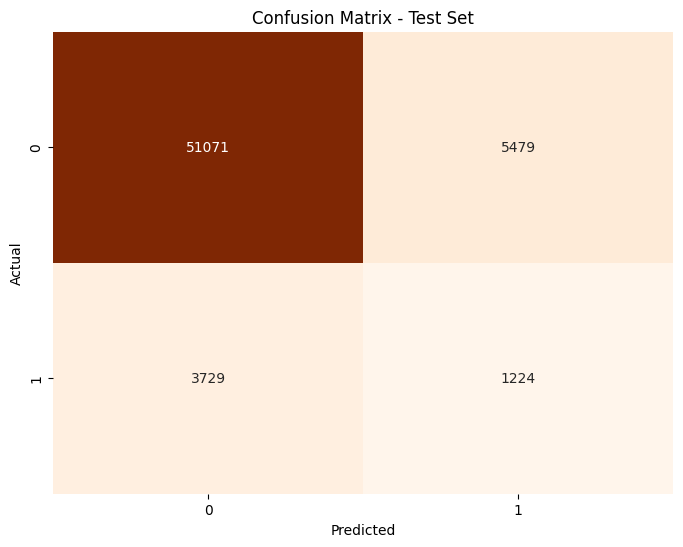

In [79]:
# Predict Train and Test set
y_train_pred_rf_improve = rf_randomcv_best.predict(X_train_balanced)
y_test_pred_rf_improve = rf_randomcv_best.predict(X_test_final)

# Check Performance Baseline Model against Train-Set
print('Classification Report : \n', classification_report(y_train_balanced, y_train_pred_rf_improve), '\n')

# Check Performance Baseline Model against Test-Set
print('Classification Report : \n', classification_report(y_test, y_test_pred_rf_improve), '\n')
print('Confusion Matrix - Test Set : \n', confusion_matrix(y_test, y_test_pred_rf_improve), '\n')

# Visualize Confusion Matrix - Test Set
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_test_pred_rf_improve), annot=True, cmap='Oranges', fmt='g', cbar=False)
plt.title('Confusion Matrix - Test Set')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [80]:
f1_train_cross_val_rf_improved = cross_val_score(rf_randomcv_best,
                                                  X_train_balanced,
                                                  y_train_balanced,
                                                  cv=3,
                                                  scoring="f1")

In [81]:
# Performance_report dengan hasil cross-validation Random Forest (Improve)
all_reports = performance_report(all_reports, y_train_balanced, y_train_pred_rf_improve, y_test, y_test_pred_rf_improve, "RF (Improve)", f1_cv_scores = f1_train_cross_val_rf_improved)
pd.DataFrame(all_reports)

,KNN (Baseline),LogReg (Baseline),Decision Tree (Baseline),RF (Baseline),Adaboost (Baseline),RF (Improve)
train - precision,0.915392,0.675701,1.0,1.0,0.744001,0.999978
train - recall,0.898667,0.675658,1.0,1.0,0.743378,0.999978
train - accuracy,0.898667,0.675658,1.0,1.0,0.743378,0.999978
train - f1_score,0.897637,0.675638,1.0,1.0,0.743214,0.999978
test - precision,0.867355,0.89153,0.862033,0.871398,0.878959,0.871606
test - recall,0.697023,0.677544,0.776369,0.849373,0.698714,0.850284
test - accuracy,0.697023,0.677544,0.776369,0.849373,0.698714,0.850284
test - f1_score,0.763084,0.750689,0.813816,0.859755,0.765409,0.860346
cv - f1_score_mean,0.860235,0.673058,0.817277,0.895353,0.749058,0.892116
cv - f1_score_std,0.001165,0.001504,0.022308,0.021894,0.024008,0.022133


## 6.2 Improve Model Adaboost

In [127]:
# start_time = time.time()

# # Define the parameter grid for GridSearchCV
# param_grid_ada = {
#     'n_estimators': [50, 100, 150], # Jumlah estimator
#     'learning_rate': [0.01, 0.1, 0.5],  # Tingkat pembelajaran
#     'algorithm' : ['SAMME', 'SAMME.R']
# }
# param_grid_ada

{'n_estimators': [50, 100, 150],
 'learning_rate': [0.01, 0.1, 0.5],
 'algorithm': ['SAMME', 'SAMME.R']}

In [129]:
# # Inisialisasi RandomizedSearchCV tanpa menggunakan randint
# random_search_ada = RandomizedSearchCV(estimator=model_ada, 
#                                    param_distributions=param_grid_ada, 
#                                    n_iter=10,  # Jumlah kombinasi parameter yang akan dievaluasi
#                                    cv=5, # Jumlah lipatan cross-validation
#                                    scoring='f1', 
#                                    random_state=42)

# # Melakukan RandomizedSearchCV pada data
# random_search_ada.fit(X_train_balanced, y_train_balanced)

RandomizedSearchCV(cv=5, estimator=AdaBoostClassifier(),
                   param_distributions={'algorithm': ['SAMME', 'SAMME.R'],
                                        'learning_rate': [0.01, 0.1, 0.5],
                                        'n_estimators': [50, 100, 150]},
                   random_state=42, scoring='f1')

In [130]:
# # Print the best parameters and the corresponding accuracy score
# print("Best parameters:", random_search_ada.best_params_) # Get Best Hyperparameters
# print("Best f1 score:", random_search_ada.best_score_)

Best parameters: {'n_estimators': 100, 'learning_rate': 0.5, 'algorithm': 'SAMME.R'}
Best f1 score: 0.7504367661300909


In [131]:
# # Get Best Estimator
# ada_randomcv_best = random_search_ada.best_estimator_

Classification Report : 
               precision    recall  f1-score   support

           0       0.76      0.71      0.74    226136
           1       0.73      0.77      0.75    226136

    accuracy                           0.74    452272
   macro avg       0.75      0.74      0.74    452272
weighted avg       0.75      0.74      0.74    452272
 

Classification Report : 
               precision    recall  f1-score   support

           0       0.95      0.71      0.81     56550
           1       0.14      0.53      0.22      4953

    accuracy                           0.70     61503
   macro avg       0.54      0.62      0.52     61503
weighted avg       0.88      0.70      0.76     61503
 

Confusion Matrix - Test Set : 
 [[40288 16262]
 [ 2317  2636]] 



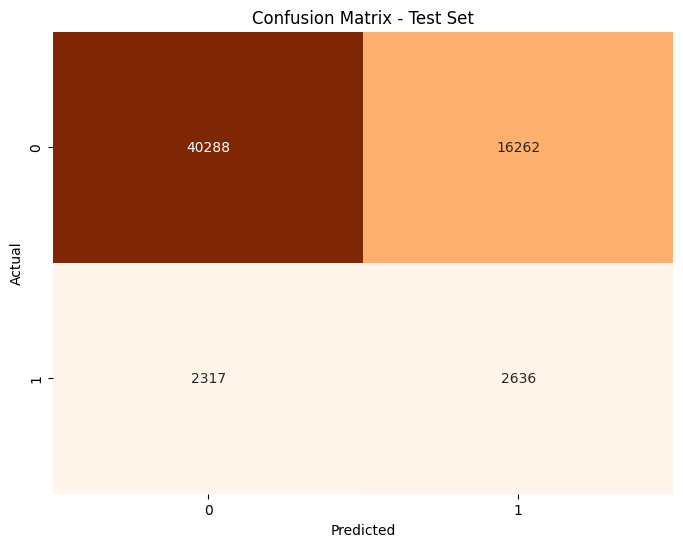

In [132]:
# # Predict Train and Test set
# y_train_pred_ada_improve = ada_randomcv_best.predict(X_train_balanced)
# y_test_pred_ada_improve = ada_randomcv_best.predict(X_test_final)

# # Check Performance Baseline Model against Train-Set
# print('Classification Report : \n', classification_report(y_train_balanced, y_train_pred_ada_improve), '\n')

# # Check Performance Baseline Model against Test-Set
# print('Classification Report : \n', classification_report(y_test, y_test_pred_ada_improve), '\n')
# print('Confusion Matrix - Test Set : \n', confusion_matrix(y_test, y_test_pred_ada_improve), '\n')

# # Visualize Confusion Matrix - Test Set
# plt.figure(figsize=(8, 6))
# sns.heatmap(confusion_matrix(y_test, y_test_pred_ada_improve), annot=True, cmap='Oranges', fmt='g', cbar=False)
# plt.title('Confusion Matrix - Test Set')
# plt.xlabel('Predicted')
# plt.ylabel('Actual')
# plt.show()

In [136]:
# f1_train_cross_val_ada_improved = cross_val_score(ada_randomcv_best,
#                                                   X_train_balanced,
#                                                   y_train_balanced,
#                                                   cv=3,
#                                                   scoring="f1")

# print('F1 Score - All - Cross Validation Rain Forest    : ', f1_train_cross_val_ada_improved)
# print('F1 Score - Mean - Cross Validation Rain Forest   : ', f1_train_cross_val_ada_improved.mean())
# print('F1 Score - Std - Cross Validation Rain Forest    : ', f1_train_cross_val_ada_improved.std())
# print('F1 Score - Range of Test-Set Rain Forest         : ', (f1_train_cross_val_ada_improved.mean()-f1_train_cross_val_ada_improved.std()) ,
#        '-', (f1_train_cross_val_ada_improved.mean()+f1_train_cross_val_ada_improved.std()))

F1 Score - All - Cross Validation Rain Forest    :  [0.72130862 0.76579629 0.76735253]
F1 Score - Mean - Cross Validation Rain Forest   :  0.7514858097037602
F1 Score - Std - Cross Validation Rain Forest    :  0.021347953859264076
F1 Score - Range of Test-Set Rain Forest         :  0.7301378558444962 - 0.7728337635630242


In [135]:
# all_reports = performance_report(all_reports, y_train_balanced, y_train_pred_ada_improve, y_test, y_test_pred_ada_improve,"Adaboost (Improve)")
# pd.DataFrame(all_reports)

,KNN (Baseline),Logistic Regression (Baseline),Decision Tree (Baseline),Random Forest (Baseline),Adaboost (Baseline),Adaboost (Improve)
train - precision,0.915366,0.674487,1.000000,1.000000,0.742800,0.745700
train - recall,0.898714,0.674437,1.000000,1.000000,0.742142,0.744806
train - accuracy,0.898714,0.674437,1.000000,1.000000,0.742142,0.744806
train - f1_score,0.897688,0.674414,1.000000,1.000000,0.741967,0.744574
test - precision,0.866978,0.891519,0.862196,0.871606,0.878431,0.880697
test - recall,0.697690,0.677186,0.777604,0.851357,0.696747,0.697917
test - accuracy_score,0.697690,0.677186,0.777604,0.851357,0.696747,0.697917
test - f1_score,0.763504,0.750421,0.814615,0.860936,0.763964,0.764985


# 7. Clustering Base on Proba

In [178]:
# Dapatkan prediksi probabilitas untuk data train dan test
y_train_proba = ada_randomcv_best.predict_proba(X_train_balanced)[:,1]
y_test_proba = ada_randomcv_best.predict_proba(X_test_final)[:,1]


In [179]:
# Tampilkan bentuk hasil prediksi probabilitas
print("Shape of train proba:", y_train_proba.shape)
print("Shape of test proba:", y_test_proba.shape)

Shape of train proba: (452272,)
Shape of test proba: (61503,)


In [180]:
# Tampilkan contoh prediksi probabilitas untuk data train dan test
print("Example of train proba:", y_train_proba[:5])
print("Example of test proba:", y_test_proba[:5])

Example of train proba: [0.49093902 0.49882982 0.49748593 0.50873189 0.5020279 ]
Example of test proba: [0.50316457 0.49742435 0.495823   0.49375872 0.4988942 ]


In [176]:
# filtering_array = [h for h in y_train_proba if h > 0.52]
# filtering_array

[]

In [181]:
X_train

,SK_ID_CURR,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,DAYS_BIRTH,EXT_SOURCE_1,EXT_SOURCE_3,EXT_SOURCE_2,DAYS_ID_PUBLISH,DAYS_REGISTRATION,OCCUPATION_TYPE,DAYS_LAST_PHONE_CHANGE,DAYS_EMPLOYED
22973,126731,45000.0,191880.0,18819.0,-22555,0.786108,0.617826,0.157320,-4326,-10407.0,unknown,0.0,365243
229678,366022,180000.0,450000.0,20979.0,-19279,0.626384,0.662638,0.556581,-2826,-5438.0,Laborers,-503.0,-430
1237,101460,85500.0,454500.0,23337.0,-16893,0.505998,0.535276,0.591165,-414,-4262.0,Cleaning staff,-1530.0,-284
240062,377981,202500.0,755190.0,36459.0,-11745,0.505998,0.486653,0.238699,-1236,-6010.0,Sales staff,-1040.0,-1034
33320,138606,252000.0,1159411.5,46111.5,-15422,0.505998,0.477649,0.466012,-4846,-4428.0,Managers,-714.0,-1008
...,...,...,...,...,...,...,...,...,...,...,...,...,...
33867,139243,315000.0,900000.0,38263.5,-14315,0.734973,0.692559,0.632271,-5083,-6727.0,Laborers,-1453.0,-2304
84434,197953,153000.0,808650.0,26217.0,-12737,0.724015,0.468660,0.745861,-1367,-765.0,Managers,-1752.0,-4677
95816,211235,90000.0,535500.0,22819.5,-23186,0.881423,0.535276,0.343698,-4375,-4665.0,unknown,-20.0,365243
203245,335629,157500.0,808650.0,26217.0,-17413,0.603220,0.535276,0.542123,-947,-6346.0,Drivers,0.0,-1109


In [152]:
X_test['predic Probabilitas'] = y_test_proba

In [153]:
X_test

,SK_ID_CURR,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,DAYS_BIRTH,EXT_SOURCE_1,EXT_SOURCE_3,EXT_SOURCE_2,DAYS_ID_PUBLISH,DAYS_REGISTRATION,OCCUPATION_TYPE,DAYS_LAST_PHONE_CHANGE,DAYS_EMPLOYED,predic Probabilitas
49103,156852,126000.0,888840.0,32053.5,-11222,0.397810,0.310818,0.523258,-2527,-5197.0,Core staff,-1493.0,-721,0.503165
96031,211489,225000.0,360000.0,30798.0,-18005,0.445130,0.535276,0.577334,-1456,-4816.0,Drivers,-1587.0,-2354,0.497424
300915,448618,126000.0,312768.0,23382.0,-22581,0.505998,0.551381,0.732679,-5098,-5099.0,unknown,-587.0,365243,0.495823
260145,401051,225000.0,1096020.0,55962.0,-18573,0.633743,0.347418,0.498608,-2092,-8186.0,Security staff,-2062.0,-2575,0.493759
99054,215007,270000.0,1288350.0,37800.0,-13238,0.636607,0.221335,0.341010,-4044,-7362.0,Laborers,-683.0,-125,0.498894
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142327,265026,90000.0,1350000.0,37125.0,-18992,0.505998,0.403142,0.262258,-2528,-16443.0,unknown,-1078.0,365243,0.500657
124190,244019,112500.0,450000.0,16294.5,-13321,0.216188,0.547810,0.732704,-1750,-3849.0,Medicine staff,-647.0,-5392,0.496842
191254,321753,112500.0,225000.0,11619.0,-12094,0.446364,0.549597,0.709340,-3957,-5806.0,Laborers,-1002.0,-1592,0.496103
29485,134238,112500.0,170640.0,6561.0,-20239,0.505998,0.609276,0.350831,-2983,-10613.0,Low-skill Laborers,0.0,-2270,0.493109


In [183]:
X_test_cluster = X_test
X_test_cluster

,SK_ID_CURR,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,DAYS_BIRTH,EXT_SOURCE_1,EXT_SOURCE_3,EXT_SOURCE_2,DAYS_ID_PUBLISH,DAYS_REGISTRATION,OCCUPATION_TYPE,DAYS_LAST_PHONE_CHANGE,DAYS_EMPLOYED,predic Probabilitas
49103,156852,126000.0,888840.0,32053.5,-11222,0.397810,0.310818,0.523258,-2527,-5197.0,Core staff,-1493.0,-721,0.503165
96031,211489,225000.0,360000.0,30798.0,-18005,0.445130,0.535276,0.577334,-1456,-4816.0,Drivers,-1587.0,-2354,0.497424
300915,448618,126000.0,312768.0,23382.0,-22581,0.505998,0.551381,0.732679,-5098,-5099.0,unknown,-587.0,365243,0.495823
260145,401051,225000.0,1096020.0,55962.0,-18573,0.633743,0.347418,0.498608,-2092,-8186.0,Security staff,-2062.0,-2575,0.493759
99054,215007,270000.0,1288350.0,37800.0,-13238,0.636607,0.221335,0.341010,-4044,-7362.0,Laborers,-683.0,-125,0.498894
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142327,265026,90000.0,1350000.0,37125.0,-18992,0.505998,0.403142,0.262258,-2528,-16443.0,unknown,-1078.0,365243,0.500657
124190,244019,112500.0,450000.0,16294.5,-13321,0.216188,0.547810,0.732704,-1750,-3849.0,Medicine staff,-647.0,-5392,0.496842
191254,321753,112500.0,225000.0,11619.0,-12094,0.446364,0.549597,0.709340,-3957,-5806.0,Laborers,-1002.0,-1592,0.496103
29485,134238,112500.0,170640.0,6561.0,-20239,0.505998,0.609276,0.350831,-2983,-10613.0,Low-skill Laborers,0.0,-2270,0.493109


In [184]:
X_test_cluster.describe()

,SK_ID_CURR,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,DAYS_BIRTH,EXT_SOURCE_1,EXT_SOURCE_3,EXT_SOURCE_2,DAYS_ID_PUBLISH,DAYS_REGISTRATION,DAYS_LAST_PHONE_CHANGE,DAYS_EMPLOYED,predic Probabilitas
count,61503.000000,6.150300e+04,6.150300e+04,61503.000000,61503.000000,61503.000000,61503.000000,61503.000000,61503.000000,61503.000000,61503.000000,61503.000000,61503.000000
mean,277881.624896,1.678322e+05,6.002195e+05,27137.654797,-16025.494317,0.504229,0.516038,0.513872,-2998.786222,-4980.027479,-960.566737,63311.415134,0.496521
std,102717.742480,9.650120e+04,4.050742e+05,14484.501026,4360.021485,0.138906,0.174608,0.190767,1507.607349,3514.580863,823.353131,140858.229252,0.006213
min,100002.000000,2.700000e+04,4.500000e+04,2052.000000,-25197.000000,0.015600,0.000527,0.000005,-6551.000000,-23738.000000,-4039.000000,-17139.000000,0.469919
25%,188921.500000,1.125000e+05,2.700000e+05,16524.000000,-19665.000000,0.505998,0.417100,0.392095,-4299.000000,-7460.000000,-1565.000000,-2770.000000,0.492420
50%,277768.000000,1.485000e+05,5.172660e+05,24907.500000,-15736.000000,0.505998,0.535276,0.565747,-3262.000000,-4490.000000,-757.000000,-1225.000000,0.496865
75%,366278.000000,2.025000e+05,8.086500e+05,34668.000000,-12425.000000,0.505998,0.636376,0.662916,-1725.000000,-2032.000000,-274.000000,-290.000000,0.501018
max,456249.000000,3.950060e+06,4.050000e+06,230161.500000,-7678.000000,0.951624,0.896010,0.855000,0.000000,0.000000,0.000000,365243.000000,0.513817


In [196]:
X_test_cluster

,SK_ID_CURR,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,DAYS_BIRTH,EXT_SOURCE_1,EXT_SOURCE_3,EXT_SOURCE_2,DAYS_ID_PUBLISH,DAYS_REGISTRATION,OCCUPATION_TYPE,DAYS_LAST_PHONE_CHANGE,DAYS_EMPLOYED,predic Probabilitas
49103,156852,126000.0,888840.0,32053.5,-11222,0.397810,0.310818,0.523258,-2527,-5197.0,Core staff,-1493.0,-721,0.503165
96031,211489,225000.0,360000.0,30798.0,-18005,0.445130,0.535276,0.577334,-1456,-4816.0,Drivers,-1587.0,-2354,0.497424
300915,448618,126000.0,312768.0,23382.0,-22581,0.505998,0.551381,0.732679,-5098,-5099.0,unknown,-587.0,365243,0.495823
260145,401051,225000.0,1096020.0,55962.0,-18573,0.633743,0.347418,0.498608,-2092,-8186.0,Security staff,-2062.0,-2575,0.493759
99054,215007,270000.0,1288350.0,37800.0,-13238,0.636607,0.221335,0.341010,-4044,-7362.0,Laborers,-683.0,-125,0.498894
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142327,265026,90000.0,1350000.0,37125.0,-18992,0.505998,0.403142,0.262258,-2528,-16443.0,unknown,-1078.0,365243,0.500657
124190,244019,112500.0,450000.0,16294.5,-13321,0.216188,0.547810,0.732704,-1750,-3849.0,Medicine staff,-647.0,-5392,0.496842
191254,321753,112500.0,225000.0,11619.0,-12094,0.446364,0.549597,0.709340,-3957,-5806.0,Laborers,-1002.0,-1592,0.496103
29485,134238,112500.0,170640.0,6561.0,-20239,0.505998,0.609276,0.350831,-2983,-10613.0,Low-skill Laborers,0.0,-2270,0.493109


In [212]:
cluster1=X_test.loc[X_test['predic Probabilitas'].between(0,0.12)]
cluster1

,SK_ID_CURR,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,DAYS_BIRTH,EXT_SOURCE_1,EXT_SOURCE_3,EXT_SOURCE_2,DAYS_ID_PUBLISH,DAYS_REGISTRATION,OCCUPATION_TYPE,DAYS_LAST_PHONE_CHANGE,DAYS_EMPLOYED,predic Probabilitas


In [213]:
cluster1.describe()

,SK_ID_CURR,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,DAYS_BIRTH,EXT_SOURCE_1,EXT_SOURCE_3,EXT_SOURCE_2,DAYS_ID_PUBLISH,DAYS_REGISTRATION,DAYS_LAST_PHONE_CHANGE,DAYS_EMPLOYED,predic Probabilitas
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
cluster2=X_test.loc[X_test['predic Probabilitas'].between(0,0.12)]
cluster1

In [ ]:
# # Buat dataframe baru dengan kolom-kolom yang diinginkan
# proba_df = pd.DataFrame({
#     'SK_ID_CURR': X_test_final['SK_ID_CURR'],  # ID pelamar
#     'AMT_INCOME_TOTAL': X_test_final['AMT_INCOME_TOTAL'],  # Total pendapatan
#     'AMT_CREDIT': X_test_final['AMT_CREDIT'],  # Jumlah kredit
#     'AMT_ANNUITY': X_test_final['AMT_ANNUITY'],  # Anuitas kredit
#     'DAYS_BIRTH': X_test_final['DAYS_BIRTH'],  # Hari lahir
#     'EXT_SOURCE_1': X_test_final['EXT_SOURCE_1'],  # Sumber eksternal 1
#     'EXT_SOURCE_3': X_test_final['EXT_SOURCE_3'],  # Sumber eksternal 3
#     'EXT_SOURCE_2': X_test_final['EXT_SOURCE_2'],  # Sumber eksternal 2
#     'DAYS_ID_PUBLISH': X_test_final['DAYS_ID_PUBLISH'],  # Hari penerbitan ID
#     'DAYS_REGISTRATION': X_test_final['DAYS_REGISTRATION'],  # Hari pendaftaran
#     'OCCUPATION_TYPE': X_test_final['OCCUPATION_TYPE'],  # Tipe pekerjaan
#     'DAYS_LAST_PHONE_CHANGE': X_test_final['DAYS_LAST_PHONE_CHANGE'],  # Hari terakhir ganti telepon
#     'DAYS_EMPLOYED': X_test_final['DAYS_EMPLOYED'],  # Hari bekerja
#     'Probability_0': y_test_proba.iloc[:, 0],  # Probabilitas kelas 0
#     'Probability_1': y_test_proba.iloc[:, 1]   # Probabilitas kelas 1
# })

# # Tampilkan dataframe baru
# print(proba_df.head())

**MODEL EVALUATION IMPROVE MODEL**

Pada kasus ini diharapkan model ini mampu membedakan 0 dan 1. positif pada kasus ini adalah 1 (kartu kredit di default). jika model tersebut lebih banyak memprediksi false positif, maka dapat merugikan perusahan karena jika model menebak diblokir padahal tidak diblokir, maka customer menjadi tidak puas dan dapat menyebabkan customer yang rajin bayar cicilan pindah ke bank/perusahan kredit lain sehingga perusahan mengalami customer tersebut. jika model tersebut banyak menebak false negatif, maka perusahaan juga dapat dirugikan. ketika customer yang sering telat bayar atau melakukan tunggakan dan kartu kreditnya tidak diblokir, maka customer tersebut bisa belanja terus dan hal tersebut membuat perusahan mengalami kerugian besar. oleh karena itu, pada kasus ini tidak diharapkan nilai FN (false negatif) atau FP (false positif) melainkan diharapkan model mampu memprediksi dengan benar 0 dan 1 serta mampu mebedakan 0 dan 1 secara akurat.

Untuk mengetahui hal tersebut, dilihat dari nilai f1 score, accuracy, recall, dan precision. dikarenakan data yang imbalance, maka tidak dapat melihat keakurasian model dalam memprediksi mengunakan nilai akurasi. Pada kasus ini tidak diharapkan nilai false negatif maupun false positif dengan kata lain sebisa mungkin nilai false negatif dan nilai false positif dapat di minimalisir. oleh karena itu digunakan nilai f1 score untuk melihat seberapa banyak nilai false positif dan false negatif yang diprediksi oleh model. nilai f1 score nya semakin besar, maka nilai rata - rata kemunculan dari false positif dan false negatif semakin kecil artinya f1 score semakin besar menyebabkan model semakin akurat dalam membedakan nilai default 0 dan 1. Sehingga dari ketiga `model improve` dapat disimpulkan bahwa:


**Logistic Regression IMPROVE**

- F1 Score: Train = 0.392 & Test = 0.456

-  Meskipun mengalami peningkatan dari model sebelumnya, F1-score masih tetap lebih rendah dibandingkan dengan SVM (improve) dan KNN (improve) baik di set train maupun test. Ini menunjukkan bahwa meskipun ada perbaikan, Logistic Regression (improve) masih memiliki kinerja yang lebih rendah dalam menangani keseimbangan antara presisi dan recall.

**SVM IMPROVE**

- F1 Score: Train = 0.537 & Test = 0.574

-  SVM (improve) menunjukkan peningkatan yang signifikan dalam F1-score dari model sebelumnya di kedua set. Ini menunjukkan bahwa peningkatan SVM mampu lebih baik dalam menangani keseimbangan antara presisi dan recall, dan berhasil meningkatkan kinerja model secara keseluruhan.

**KNN IMPROVE**

- F1 Score: Train = 0.567 & Test = 0.523

-  Meskipun mengalami peningkatan dari model sebelumnya, F1-score KNN (improve) masih relatif stabil dan tidak menunjukkan peningkatan yang signifikan dibandingkan dengan SVM (improve). Ini menunjukkan bahwa peningkatan KNN mungkin kurang efektif dibandingkan dengan SVM dalam meningkatkan kinerja model.

Dengan demikian, berdasarkan evaluasi F1-score, SVM (improve) adalah pilihan terbaik di antara ketiga model untuk dataset ini, karena mampu mencapai F1-score yang lebih tinggi, menunjukkan peningkatan yang signifikan dari model sebelumnya, dan mampu menangani keseimbangan antara presisi dan recall dengan lebih baik.

# 7. Model Analysis

Saya telah menganalisis hasil dari berbagai model yang telah saya latih dan evaluasi untuk Payment Next Month Prediction. Model yang saya gunakan dalam proyek ini adalah regresi logistik, support vector machine (SVM), dan k-nearest neighbors (KNN). Saya menganailisa model baseline dan saya juga telah melakukan tuning untuk setiap model untuk menemukan hyperparameter terbaik. Saya berfokus pada metric F1 Score karena data imbalance, pada kasus ini tidak diharapkan nilai false negatif maupun false positif dengan kata lain sebisa mungkin nilai false negatif dan nilai false positif dapat di minimalisir. oleh karena itu digunakan nilai f1 score untuk melihat seberapa banyak nilai false positif dan false negatif yang diprediksi oleh model.

# 8. Model Saving

In [82]:
import pickle
import json

with open('model_randomforest_improve.pkl', 'wb') as file_1: # ini nama file
  pickle.dump(rf_randomcv_best, file_1) # ini nama model
with open('model_scaler_n.pkl', 'wb') as file_2: # ini nama file scaler normal
  pickle.dump(scaler_n, file_2) # ini nama scaler normal
with open('model_scaler_s.pkl', 'wb') as file_3: # ini nama file scaler skew
  pickle.dump(scaler_s, file_3) # ini nama scaler skew
with open('model_encoder.pkl', 'wb') as file_4: # ini nama file encoder nominal
  pickle.dump(encoder, file_4) # ini nama encoder
with open('list_num_col_n.txt', 'w') as file_5: # ini nama file
  json.dump(num_col_n, file_5) # ini nama kolom numerical normal
with open('list_num_col_s.txt', 'w') as file_6: # ini nama file
  json.dump(num_col_s, file_6) # ini nama kolom numerical skew
with open('list_cat_col.txt', 'w') as file_7: # ini nama file
  json.dump(cat_col, file_7) # ini nama kolom categorical

In [83]:
# Mengambil data random dari hasil data final
df[:5].to_dict()

{'Unnamed: 0': {0: 0, 1: 1, 2: 2, 3: 3, 4: 4},
 'SK_ID_CURR': {0: 100002, 1: 100003, 2: 100004, 3: 100006, 4: 100007},
 'TARGET': {0: 1, 1: 0, 2: 0, 3: 0, 4: 0},
 'NAME_CONTRACT_TYPE': {0: 'Cash loans',
  1: 'Cash loans',
  2: 'Revolving loans',
  3: 'Cash loans',
  4: 'Cash loans'},
 'CODE_GENDER': {0: 'M', 1: 'F', 2: 'M', 3: 'F', 4: 'M'},
 'FLAG_OWN_CAR': {0: 'N', 1: 'N', 2: 'Y', 3: 'N', 4: 'N'},
 'FLAG_OWN_REALTY': {0: 'Y', 1: 'N', 2: 'Y', 3: 'Y', 4: 'Y'},
 'CNT_CHILDREN': {0: 0, 1: 0, 2: 0, 3: 0, 4: 0},
 'AMT_INCOME_TOTAL': {0: 202500.0,
  1: 270000.0,
  2: 67500.0,
  3: 135000.0,
  4: 121500.0},
 'AMT_CREDIT': {0: 406597.5,
  1: 1293502.5,
  2: 135000.0,
  3: 312682.5,
  4: 513000.0},
 'AMT_ANNUITY': {0: 24700.5, 1: 35698.5, 2: 6750.0, 3: 29686.5, 4: 21865.5},
 'AMT_GOODS_PRICE': {0: 351000.0,
  1: 1129500.0,
  2: 135000.0,
  3: 297000.0,
  4: 513000.0},
 'NAME_TYPE_SUITE': {0: 'Unaccompanied',
  1: 'Family',
  2: 'Unaccompanied',
  3: 'Unaccompanied',
  4: 'Unaccompanied'},
 'NAM